# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
# !pip install pickle-mixin
!pip install keras
!pip install tensorflow


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [2]:
#Loading data into dataframe

data = pd.read_csv("check.csv")
# benign_urls = data1[data1['class'] == -1]
# phishing_urls = data1[data1['class'] == 1]
# random_benign_urls = benign_urls.sample(n=4000, random_state=42)
# random_phishing_urls = phishing_urls.sample(n=4000, random_state=42)
# sampled_dataset = pd.concat([random_benign_urls, random_phishing_urls])
# data = sampled_dataset.sample(frac=1).reset_index(drop=True)
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

# Listing the features of the dataset

data.columns

In [4]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [5]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [6]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [7]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


data_set.append(9 OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
print(data.columns)


In [10]:
#pairplot for particular features

#df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
#sns.pairplot(data = df,hue="class",corner=True);

# Select relevant columns
df = data[['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label']]

# Plot pairplot
sns.pairplot(data=df, hue="Label", corner=True);





KeyError: "None of [Index(['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label'], dtype='object')] are in the [columns]"

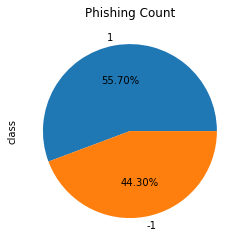

In [13]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

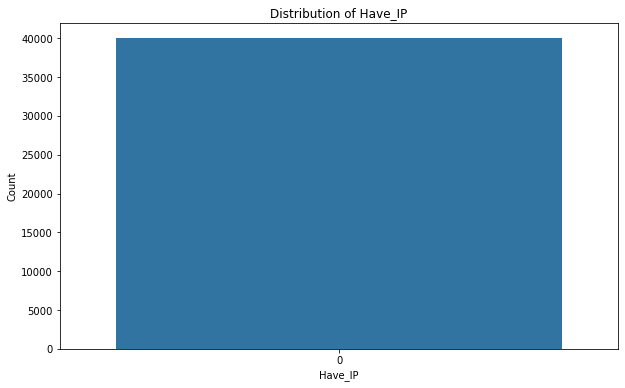

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Have_IP', data=data)
plt.title('Distribution of Have_IP')
plt.xlabel('Have_IP')
plt.ylabel('Count')
plt.show()


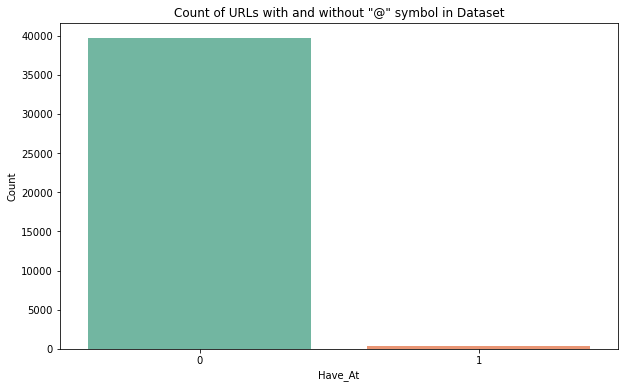

In [13]:
# Plot count plot for 'Have_At' attribute
plt.figure(figsize=(10, 6))
sns.countplot(x='Have_At', data=data, palette='Set2')
plt.xlabel('Have_At')
plt.ylabel('Count')
plt.title('Count of URLs with and without "@" symbol in Dataset')
plt.show()


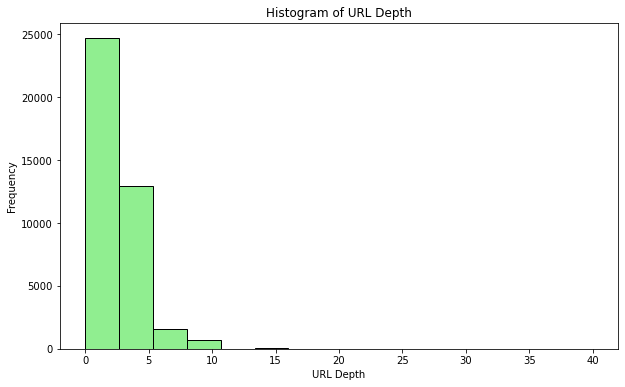

In [14]:
# Plot histogram for 'URL_Depth' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['URL_Depth'], bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('URL Depth')
plt.ylabel('Frequency')
plt.title('Histogram of URL Depth')
plt.show()


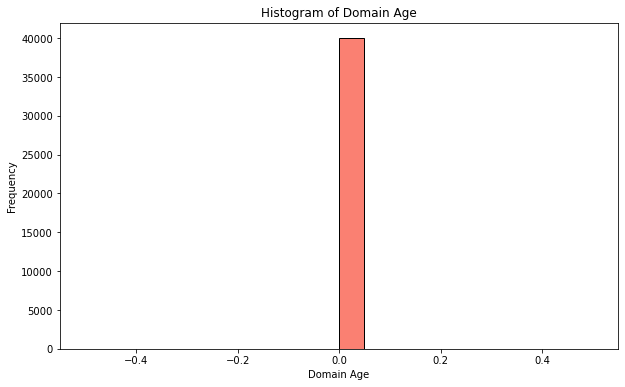

In [15]:
# Plot histogram for 'Domain_Age' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['Domain_Age'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Domain Age')
plt.ylabel('Frequency')
plt.title('Histogram of Domain Age')
plt.show()


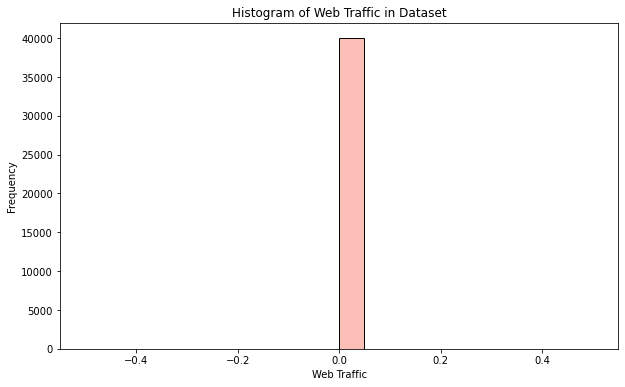

In [16]:
# Plot histogram for 'Web_Traffic' attribute
plt.figure(figsize=(10, 6))
sns.histplot(data['Web_Traffic'], bins=20, kde=True, color='salmon')
plt.xlabel('Web Traffic')
plt.ylabel('Frequency')
plt.title('Histogram of Web Traffic in Dataset')
plt.show()


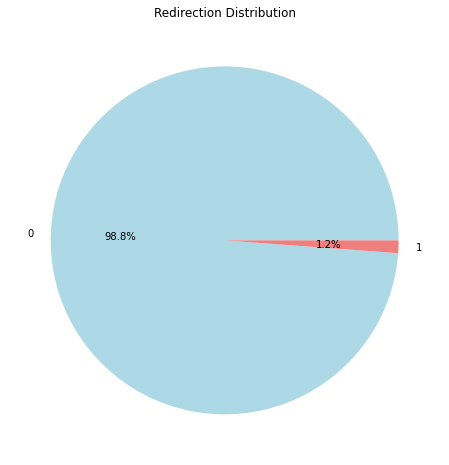

In [17]:
# Plot pie chart for 'Redirection' attribute
plt.figure(figsize=(8, 8))
data['Redirection'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Redirection Distribution')
plt.ylabel('')
plt.show()


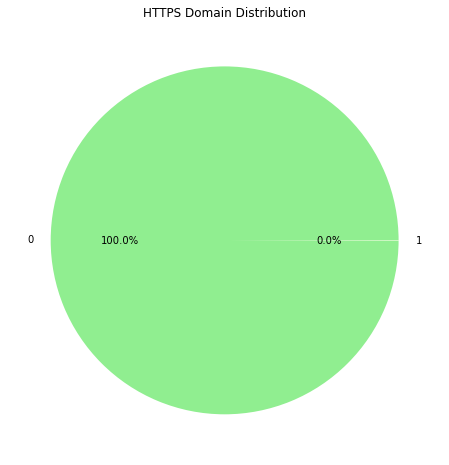

In [18]:
# Plot pie chart for 'https_Domain' attribute
plt.figure(figsize=(8, 8))
data['https_Domain'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.title('HTTPS Domain Distribution')
plt.ylabel('')
plt.show()


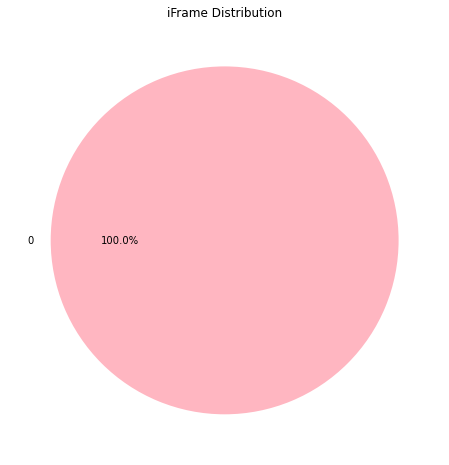

In [19]:
# Plot pie chart for 'iFrame' attribute
plt.figure(figsize=(8, 8))
data['iFrame'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'lightgrey'])
plt.title('iFrame Distribution')
plt.ylabel('')
plt.show()



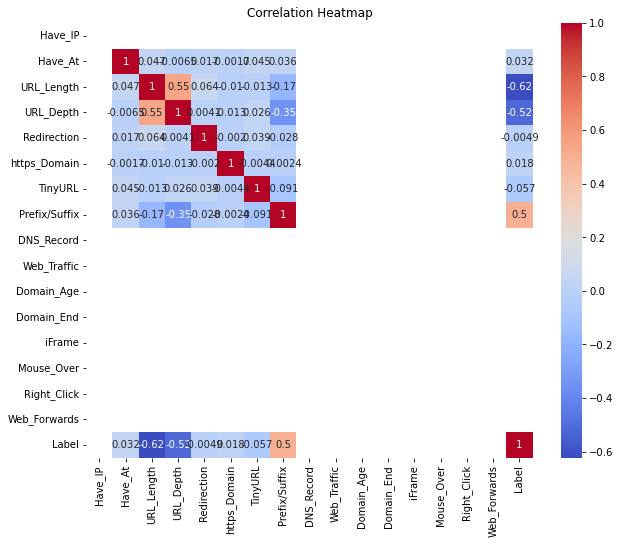

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



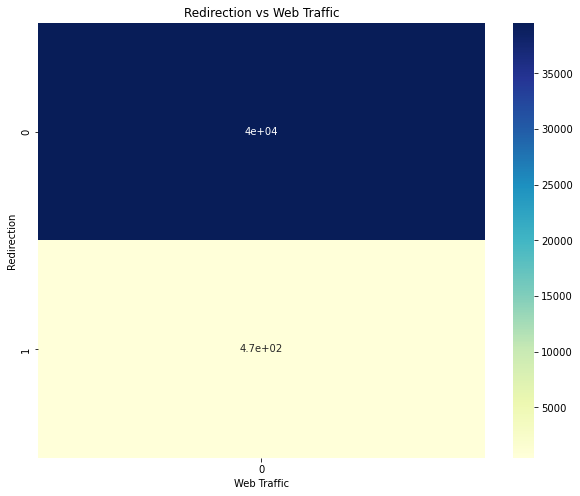

In [21]:
# Plot heatmap for Redirection vs Web Traffic
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(data['Redirection'], data['Web_Traffic']), annot=True, cmap='YlGnBu')
plt.title('Redirection vs Web Traffic')
plt.xlabel('Web Traffic')
plt.ylabel('Redirection')
plt.show()


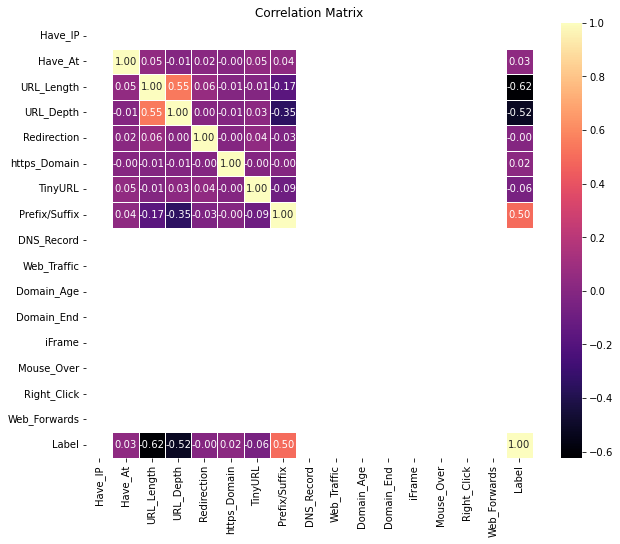

In [22]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)  # Change 'magma' to any other colormap you prefer
plt.title('Correlation Matrix')
plt.show()


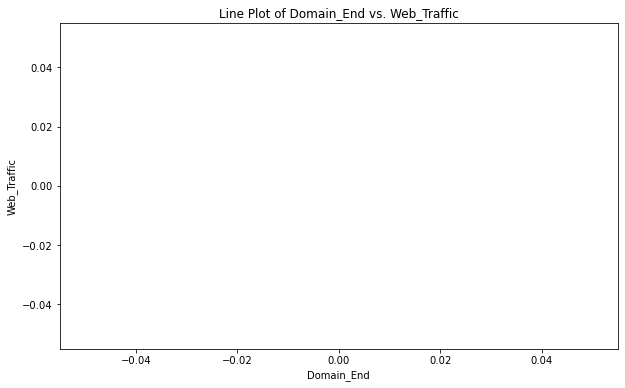

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Domain_End', y='Web_Traffic', data=data)
plt.title('Line Plot of Domain_End vs. Web_Traffic')
plt.xlabel('Domain_End')
plt.ylabel('Web_Traffic')
plt.show()


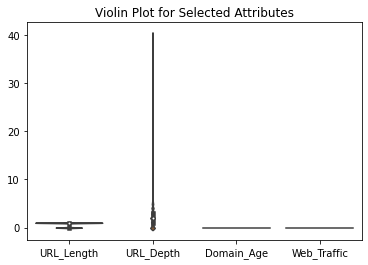

In [24]:
# Create violin plot
attributes_boxplot = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']
sns.violinplot(data=data[attributes_boxplot])
plt.title('Violin Plot for Selected Attributes')
plt.show()


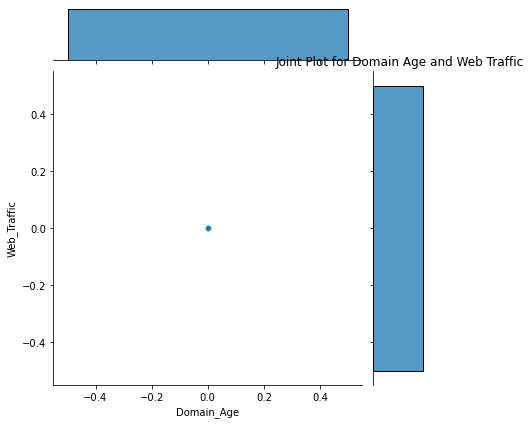

In [25]:
# Select attributes for joint plot
attributes_jointplot = ['Domain_Age', 'Web_Traffic']

# Create joint plot
sns.jointplot(x='Domain_Age', y='Web_Traffic', data=data[attributes_jointplot], kind='scatter')
plt.title('Joint Plot for Domain Age and Web Traffic')
plt.show()


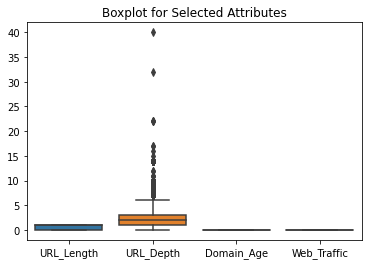

In [26]:
import seaborn as sns

# Select attributes for boxplot
attributes_boxplot = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']

# Create boxplot
sns.boxplot(data=data[attributes_boxplot])
plt.title('Boxplot for Selected Attributes')
plt.show()


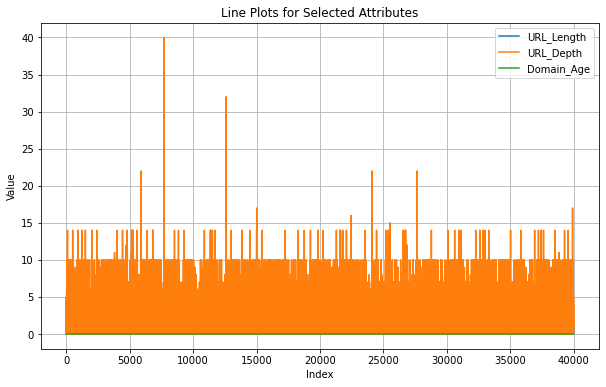

In [27]:
import matplotlib.pyplot as plt

# Define attributes for line plots
attributes = ['URL_Length', 'URL_Depth', 'Domain_Age']

# Plot line plots for each attribute
plt.figure(figsize=(10, 6))
for attribute in attributes:
    plt.plot(data[attribute], label=attribute)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plots for Selected Attributes')
plt.legend()
plt.grid(True)
plt.show()


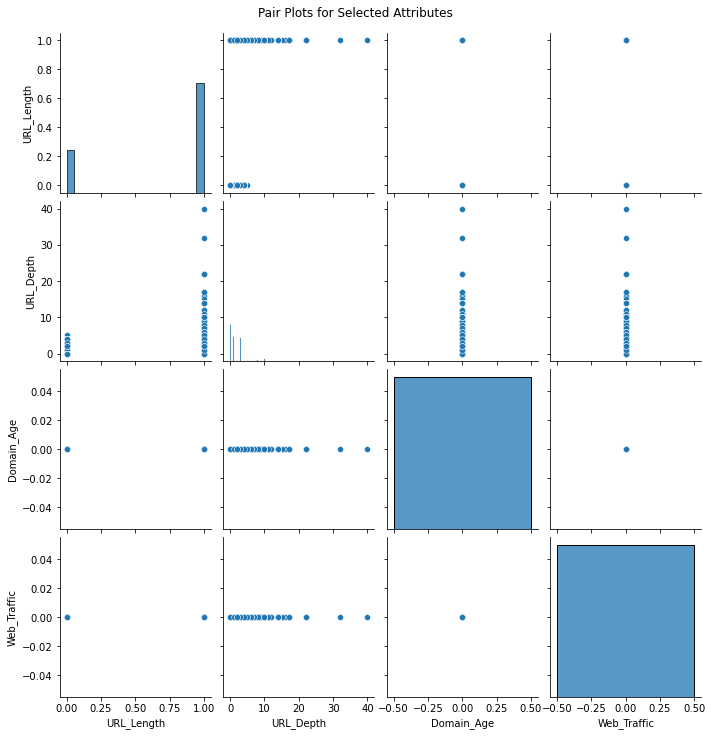

In [28]:
import seaborn as sns

# Select attributes for pair plots
attributes = ['URL_Length', 'URL_Depth', 'Domain_Age', 'Web_Traffic']

# Create pair plots
sns.pairplot(data[attributes])
plt.suptitle('Pair Plots for Selected Attributes', y=1.02)
plt.show()


## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [8]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [9]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing k-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# Initializing RFECV with Random Forest as the estimator
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# Fitting RFECV on the training data
rfecv.fit(X_train_scaled, y_train)

# Creating an empty DataFrame with column names
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

# Loop through the features and append each row to the DataFrame
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = pd.concat([df_features, pd.DataFrame([row])], ignore_index=True)

# Sorting the DataFrame based on feature ranking
df_features = df_features.sort_values(by='ranking')

# Filtering out features selected by RFECV
df_features = df_features[df_features['support']]

# Extracting the names of selected features
best_features = df_features['feature'].tolist()

# Selecting only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Get feature importances from the RandomForestClassifier
feature_importances = rfecv.estimator_.feature_importances_

# Combine features and importances into a list of tuples
feature_scores = list(zip(best_features, feature_importances))

# Sort features based on importance scores in descending order
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the selected features along with their importance scores in descending order
print("Selected Features and Importance Scores (Descending Order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Selected Features and Importance Scores (Descending Order):
URL_Length: 0.3932944797983548
Prefix/Suffix: 0.30742678867571566
URL_Depth: 0.2848597888560817
TinyURL: 0.0050925902958606495
Redirection: 0.004978845385572674
Have_At: 0.00412545280165457
https_Domain: 0.00022205418676005017


In [25]:
best_features=['URL_Length','Prefix/Suffix','URL_Depth','TinyURL','Redirection']
# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32000, 5), (32000,), (8000, 5), (8000,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [10]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [11]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [12]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [13]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [14]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [15]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

<AxesSubplot:>

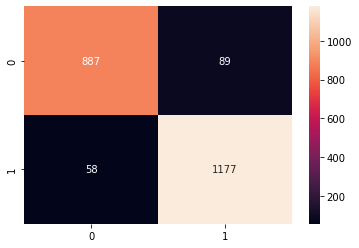

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_log)
sns.heatmap(confusion_matrix(y_test, y_test_log), annot = True, fmt='0.0f')

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [17]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [19]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [20]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



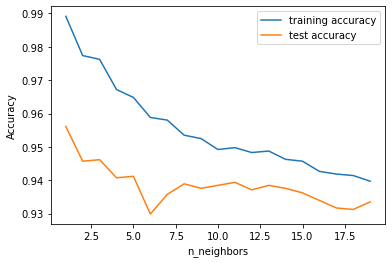

In [21]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [22]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

<AxesSubplot:>

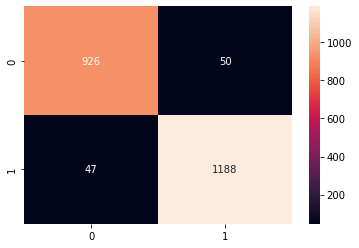

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn)
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt='0.0f')

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [24]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [25]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [26]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [27]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



<AxesSubplot:>

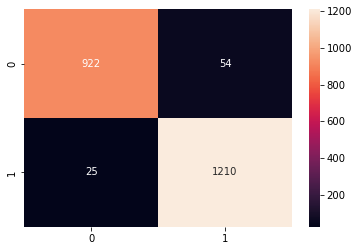

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [29]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [30]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [31]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [32]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [33]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



<AxesSubplot:>

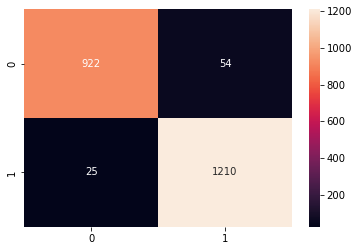

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [35]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [36]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [37]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [38]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.959

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.964

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.964


In [39]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



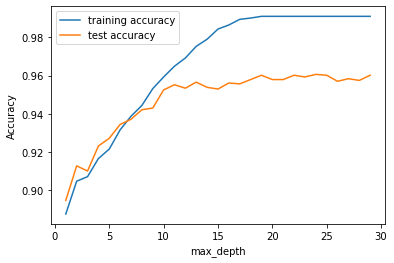

In [40]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [41]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

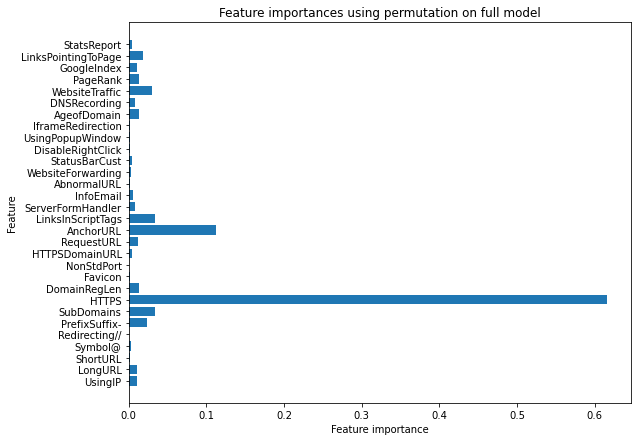

In [42]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [43]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [45]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.969

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.973

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.978

Random Forest : precision on training Data: 0.987
Random Forest : precision on test Data: 0.964


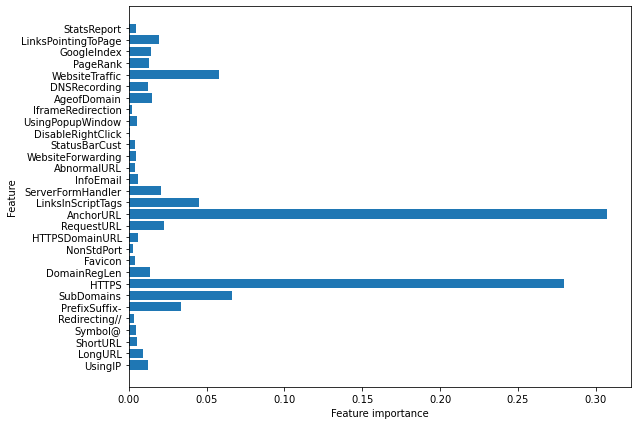

In [46]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [47]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



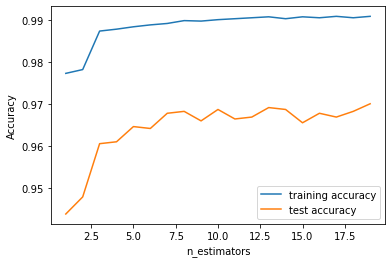

In [48]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [50]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [51]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [52]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [53]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



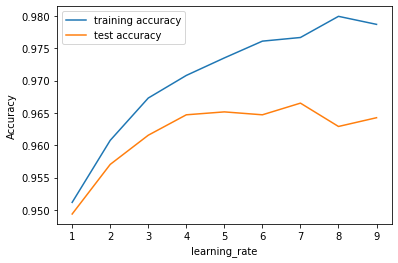

In [54]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

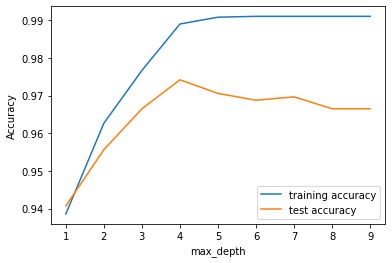

In [55]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [56]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [57]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 118ms	remaining: 1m 57s
1:	learn: 0.4349357	total: 124ms	remaining: 1m 2s
2:	learn: 0.3609236	total: 132ms	remaining: 43.8s
3:	learn: 0.3050829	total: 139ms	remaining: 34.6s
4:	learn: 0.2766620	total: 146ms	remaining: 29.1s
5:	learn: 0.2475476	total: 154ms	remaining: 25.5s
6:	learn: 0.2286637	total: 162ms	remaining: 22.9s
7:	learn: 0.2138754	total: 170ms	remaining: 21s
8:	learn: 0.2013643	total: 177ms	remaining: 19.5s
9:	learn: 0.1896378	total: 185ms	remaining: 18.3s
10:	learn: 0.1819539	total: 193ms	remaining: 17.3s
11:	learn: 0.1767867	total: 200ms	remaining: 16.5s
12:	learn: 0.1727735	total: 208ms	remaining: 15.8s
13:	learn: 0.1682578	total: 215ms	remaining: 15.2s
14:	learn: 0.1641759	total: 223ms	remaining: 14.6s
15:	learn: 0.1614218	total: 230ms	remaining: 14.1s
16:	learn: 0.1558968	total: 237ms	remaining: 13.7s
17:	learn: 0.1535881	total: 244ms	remaining: 13.3s
18:	learn: 0.1514228	total: 252ms	remaining: 13s
19:	learn: 0.1482580	total: 259ms	remaining:

177:	learn: 0.0530595	total: 1.4s	remaining: 6.45s
178:	learn: 0.0529470	total: 1.4s	remaining: 6.44s
179:	learn: 0.0527691	total: 1.41s	remaining: 6.42s
180:	learn: 0.0526404	total: 1.42s	remaining: 6.41s
181:	learn: 0.0525145	total: 1.42s	remaining: 6.4s
182:	learn: 0.0524332	total: 1.43s	remaining: 6.39s
183:	learn: 0.0522311	total: 1.44s	remaining: 6.38s
184:	learn: 0.0519353	total: 1.45s	remaining: 6.37s
185:	learn: 0.0515714	total: 1.45s	remaining: 6.36s
186:	learn: 0.0514909	total: 1.46s	remaining: 6.35s
187:	learn: 0.0513162	total: 1.47s	remaining: 6.34s
188:	learn: 0.0511884	total: 1.47s	remaining: 6.33s
189:	learn: 0.0510652	total: 1.48s	remaining: 6.32s
190:	learn: 0.0509786	total: 1.49s	remaining: 6.3s
191:	learn: 0.0508893	total: 1.5s	remaining: 6.29s
192:	learn: 0.0505900	total: 1.5s	remaining: 6.28s
193:	learn: 0.0504426	total: 1.51s	remaining: 6.27s
194:	learn: 0.0502767	total: 1.52s	remaining: 6.26s
195:	learn: 0.0500644	total: 1.52s	remaining: 6.25s
196:	learn: 0.0499

354:	learn: 0.0346415	total: 2.67s	remaining: 4.85s
355:	learn: 0.0345842	total: 2.67s	remaining: 4.84s
356:	learn: 0.0344702	total: 2.68s	remaining: 4.83s
357:	learn: 0.0343870	total: 2.69s	remaining: 4.82s
358:	learn: 0.0343532	total: 2.7s	remaining: 4.81s
359:	learn: 0.0342877	total: 2.7s	remaining: 4.8s
360:	learn: 0.0341769	total: 2.71s	remaining: 4.8s
361:	learn: 0.0341559	total: 2.72s	remaining: 4.79s
362:	learn: 0.0340802	total: 2.72s	remaining: 4.78s
363:	learn: 0.0340117	total: 2.73s	remaining: 4.77s
364:	learn: 0.0339431	total: 2.74s	remaining: 4.76s
365:	learn: 0.0338809	total: 2.75s	remaining: 4.76s
366:	learn: 0.0338159	total: 2.75s	remaining: 4.75s
367:	learn: 0.0337862	total: 2.76s	remaining: 4.74s
368:	learn: 0.0337620	total: 2.77s	remaining: 4.73s
369:	learn: 0.0337018	total: 2.77s	remaining: 4.72s
370:	learn: 0.0336391	total: 2.78s	remaining: 4.71s
371:	learn: 0.0335537	total: 2.79s	remaining: 4.71s
372:	learn: 0.0335024	total: 2.79s	remaining: 4.7s
373:	learn: 0.033

533:	learn: 0.0277973	total: 3.94s	remaining: 3.44s
534:	learn: 0.0277505	total: 3.95s	remaining: 3.43s
535:	learn: 0.0277376	total: 3.96s	remaining: 3.42s
536:	learn: 0.0277213	total: 3.96s	remaining: 3.42s
537:	learn: 0.0276906	total: 3.97s	remaining: 3.41s
538:	learn: 0.0276736	total: 3.98s	remaining: 3.4s
539:	learn: 0.0276546	total: 3.98s	remaining: 3.39s
540:	learn: 0.0276545	total: 3.99s	remaining: 3.38s
541:	learn: 0.0276230	total: 4s	remaining: 3.38s
542:	learn: 0.0275952	total: 4s	remaining: 3.37s
543:	learn: 0.0275801	total: 4.01s	remaining: 3.36s
544:	learn: 0.0275523	total: 4.02s	remaining: 3.35s
545:	learn: 0.0275116	total: 4.03s	remaining: 3.35s
546:	learn: 0.0275110	total: 4.03s	remaining: 3.34s
547:	learn: 0.0274838	total: 4.04s	remaining: 3.33s
548:	learn: 0.0274730	total: 4.05s	remaining: 3.33s
549:	learn: 0.0274373	total: 4.05s	remaining: 3.32s
550:	learn: 0.0274372	total: 4.06s	remaining: 3.31s
551:	learn: 0.0274062	total: 4.07s	remaining: 3.3s
552:	learn: 0.027353

711:	learn: 0.0253415	total: 5.21s	remaining: 2.1s
712:	learn: 0.0253414	total: 5.21s	remaining: 2.1s
713:	learn: 0.0253414	total: 5.22s	remaining: 2.09s
714:	learn: 0.0253414	total: 5.22s	remaining: 2.08s
715:	learn: 0.0253414	total: 5.23s	remaining: 2.07s
716:	learn: 0.0253414	total: 5.24s	remaining: 2.07s
717:	learn: 0.0253413	total: 5.24s	remaining: 2.06s
718:	learn: 0.0253413	total: 5.25s	remaining: 2.05s
719:	learn: 0.0253413	total: 5.25s	remaining: 2.04s
720:	learn: 0.0253413	total: 5.26s	remaining: 2.04s
721:	learn: 0.0253299	total: 5.27s	remaining: 2.03s
722:	learn: 0.0253299	total: 5.27s	remaining: 2.02s
723:	learn: 0.0253213	total: 5.28s	remaining: 2.01s
724:	learn: 0.0253213	total: 5.29s	remaining: 2s
725:	learn: 0.0253213	total: 5.29s	remaining: 2s
726:	learn: 0.0253210	total: 5.3s	remaining: 1.99s
727:	learn: 0.0253209	total: 5.31s	remaining: 1.98s
728:	learn: 0.0253208	total: 5.31s	remaining: 1.97s
729:	learn: 0.0253076	total: 5.32s	remaining: 1.97s
730:	learn: 0.0253037

882:	learn: 0.0247843	total: 6.29s	remaining: 834ms
883:	learn: 0.0247842	total: 6.3s	remaining: 826ms
884:	learn: 0.0247843	total: 6.3s	remaining: 819ms
885:	learn: 0.0247843	total: 6.31s	remaining: 812ms
886:	learn: 0.0247843	total: 6.32s	remaining: 805ms
887:	learn: 0.0247843	total: 6.32s	remaining: 797ms
888:	learn: 0.0247840	total: 6.33s	remaining: 790ms
889:	learn: 0.0247840	total: 6.33s	remaining: 783ms
890:	learn: 0.0247840	total: 6.34s	remaining: 775ms
891:	learn: 0.0247839	total: 6.34s	remaining: 768ms
892:	learn: 0.0247840	total: 6.35s	remaining: 761ms
893:	learn: 0.0247839	total: 6.36s	remaining: 754ms
894:	learn: 0.0247839	total: 6.36s	remaining: 747ms
895:	learn: 0.0247840	total: 6.37s	remaining: 739ms
896:	learn: 0.0247838	total: 6.38s	remaining: 732ms
897:	learn: 0.0247780	total: 6.38s	remaining: 725ms
898:	learn: 0.0247603	total: 6.39s	remaining: 718ms
899:	learn: 0.0247603	total: 6.4s	remaining: 711ms
900:	learn: 0.0247310	total: 6.4s	remaining: 704ms
901:	learn: 0.02

In [58]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [59]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [60]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [61]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 7.29ms	remaining: 7.28s
1:	learn: 0.4349357	total: 17.1ms	remaining: 8.51s
2:	learn: 0.3609236	total: 25ms	remaining: 8.31s
3:	learn: 0.3050829	total: 34.2ms	remaining: 8.52s
4:	learn: 0.2766620	total: 41.5ms	remaining: 8.26s
5:	learn: 0.2475476	total: 51.3ms	remaining: 8.5s
6:	learn: 0.2286637	total: 59.1ms	remaining: 8.38s
7:	learn: 0.2138754	total: 69.7ms	remaining: 8.64s
8:	learn: 0.2013643	total: 77.6ms	remaining: 8.54s
9:	learn: 0.1896378	total: 87ms	remaining: 8.62s
10:	learn: 0.1819539	total: 96.4ms	remaining: 8.67s
11:	learn: 0.1767867	total: 106ms	remaining: 8.71s
12:	learn: 0.1727735	total: 115ms	remaining: 8.77s
13:	learn: 0.1682578	total: 123ms	remaining: 8.67s
14:	learn: 0.1641759	total: 134ms	remaining: 8.79s
15:	learn: 0.1614218	total: 143ms	remaining: 8.79s
16:	learn: 0.1558968	total: 152ms	remaining: 8.79s
17:	learn: 0.1535881	total: 162ms	remaining: 8.83s
18:	learn: 0.1514228	total: 170ms	remaining: 8.8s
19:	learn: 0.1482580	total: 181ms	re

166:	learn: 0.0548825	total: 1.33s	remaining: 6.64s
167:	learn: 0.0547805	total: 1.34s	remaining: 6.63s
168:	learn: 0.0546642	total: 1.35s	remaining: 6.62s
169:	learn: 0.0543574	total: 1.35s	remaining: 6.62s
170:	learn: 0.0542539	total: 1.36s	remaining: 6.61s
171:	learn: 0.0540977	total: 1.37s	remaining: 6.61s
172:	learn: 0.0539741	total: 1.38s	remaining: 6.61s
173:	learn: 0.0537793	total: 1.4s	remaining: 6.64s
174:	learn: 0.0535499	total: 1.41s	remaining: 6.64s
175:	learn: 0.0533461	total: 1.42s	remaining: 6.65s
176:	learn: 0.0531326	total: 1.44s	remaining: 6.67s
177:	learn: 0.0530595	total: 1.45s	remaining: 6.67s
178:	learn: 0.0529470	total: 1.46s	remaining: 6.69s
179:	learn: 0.0527691	total: 1.47s	remaining: 6.69s
180:	learn: 0.0526404	total: 1.48s	remaining: 6.68s
181:	learn: 0.0525145	total: 1.49s	remaining: 6.68s
182:	learn: 0.0524332	total: 1.49s	remaining: 6.66s
183:	learn: 0.0522311	total: 1.5s	remaining: 6.66s
184:	learn: 0.0519353	total: 1.51s	remaining: 6.65s
185:	learn: 0.

325:	learn: 0.0363625	total: 2.61s	remaining: 5.39s
326:	learn: 0.0362867	total: 2.62s	remaining: 5.38s
327:	learn: 0.0362404	total: 2.62s	remaining: 5.37s
328:	learn: 0.0361574	total: 2.63s	remaining: 5.36s
329:	learn: 0.0361096	total: 2.64s	remaining: 5.36s
330:	learn: 0.0360786	total: 2.65s	remaining: 5.35s
331:	learn: 0.0360080	total: 2.65s	remaining: 5.34s
332:	learn: 0.0359705	total: 2.66s	remaining: 5.33s
333:	learn: 0.0359041	total: 2.67s	remaining: 5.32s
334:	learn: 0.0358134	total: 2.68s	remaining: 5.32s
335:	learn: 0.0357625	total: 2.69s	remaining: 5.31s
336:	learn: 0.0356498	total: 2.69s	remaining: 5.3s
337:	learn: 0.0355630	total: 2.7s	remaining: 5.29s
338:	learn: 0.0354664	total: 2.71s	remaining: 5.28s
339:	learn: 0.0354328	total: 2.72s	remaining: 5.27s
340:	learn: 0.0353908	total: 2.72s	remaining: 5.26s
341:	learn: 0.0353248	total: 2.73s	remaining: 5.26s
342:	learn: 0.0352669	total: 2.74s	remaining: 5.25s
343:	learn: 0.0352172	total: 2.75s	remaining: 5.24s
344:	learn: 0.

487:	learn: 0.0287841	total: 3.87s	remaining: 4.05s
488:	learn: 0.0287586	total: 3.87s	remaining: 4.05s
489:	learn: 0.0286968	total: 3.88s	remaining: 4.04s
490:	learn: 0.0286539	total: 3.89s	remaining: 4.03s
491:	learn: 0.0286538	total: 3.89s	remaining: 4.02s
492:	learn: 0.0286356	total: 3.9s	remaining: 4.01s
493:	learn: 0.0286061	total: 3.91s	remaining: 4s
494:	learn: 0.0285691	total: 3.92s	remaining: 4s
495:	learn: 0.0285441	total: 3.92s	remaining: 3.99s
496:	learn: 0.0285307	total: 3.93s	remaining: 3.98s
497:	learn: 0.0285271	total: 3.94s	remaining: 3.97s
498:	learn: 0.0285108	total: 3.94s	remaining: 3.96s
499:	learn: 0.0285107	total: 3.95s	remaining: 3.95s
500:	learn: 0.0284578	total: 3.96s	remaining: 3.94s
501:	learn: 0.0284303	total: 3.96s	remaining: 3.93s
502:	learn: 0.0283938	total: 3.97s	remaining: 3.92s
503:	learn: 0.0283746	total: 3.98s	remaining: 3.92s
504:	learn: 0.0283744	total: 3.99s	remaining: 3.91s
505:	learn: 0.0283597	total: 4s	remaining: 3.9s
506:	learn: 0.0283347	t

655:	learn: 0.0257100	total: 5.07s	remaining: 2.66s
656:	learn: 0.0257020	total: 5.08s	remaining: 2.65s
657:	learn: 0.0256859	total: 5.09s	remaining: 2.64s
658:	learn: 0.0256858	total: 5.09s	remaining: 2.63s
659:	learn: 0.0256554	total: 5.1s	remaining: 2.63s
660:	learn: 0.0256554	total: 5.11s	remaining: 2.62s
661:	learn: 0.0256554	total: 5.11s	remaining: 2.61s
662:	learn: 0.0256554	total: 5.12s	remaining: 2.6s
663:	learn: 0.0256554	total: 5.13s	remaining: 2.59s
664:	learn: 0.0256554	total: 5.13s	remaining: 2.59s
665:	learn: 0.0256410	total: 5.14s	remaining: 2.58s
666:	learn: 0.0256409	total: 5.15s	remaining: 2.57s
667:	learn: 0.0256409	total: 5.15s	remaining: 2.56s
668:	learn: 0.0256405	total: 5.16s	remaining: 2.55s
669:	learn: 0.0256402	total: 5.17s	remaining: 2.54s
670:	learn: 0.0256341	total: 5.17s	remaining: 2.54s
671:	learn: 0.0256340	total: 5.18s	remaining: 2.53s
672:	learn: 0.0256340	total: 5.18s	remaining: 2.52s
673:	learn: 0.0256340	total: 5.19s	remaining: 2.51s
674:	learn: 0.

820:	learn: 0.0248625	total: 6.17s	remaining: 1.34s
821:	learn: 0.0248625	total: 6.18s	remaining: 1.34s
822:	learn: 0.0248625	total: 6.18s	remaining: 1.33s
823:	learn: 0.0248625	total: 6.19s	remaining: 1.32s
824:	learn: 0.0248624	total: 6.2s	remaining: 1.31s
825:	learn: 0.0248624	total: 6.2s	remaining: 1.31s
826:	learn: 0.0248624	total: 6.21s	remaining: 1.3s
827:	learn: 0.0248540	total: 6.22s	remaining: 1.29s
828:	learn: 0.0248539	total: 6.22s	remaining: 1.28s
829:	learn: 0.0248539	total: 6.23s	remaining: 1.28s
830:	learn: 0.0248539	total: 6.24s	remaining: 1.27s
831:	learn: 0.0248539	total: 6.24s	remaining: 1.26s
832:	learn: 0.0248539	total: 6.25s	remaining: 1.25s
833:	learn: 0.0248539	total: 6.25s	remaining: 1.25s
834:	learn: 0.0248538	total: 6.26s	remaining: 1.24s
835:	learn: 0.0248538	total: 6.27s	remaining: 1.23s
836:	learn: 0.0248538	total: 6.27s	remaining: 1.22s
837:	learn: 0.0248538	total: 6.28s	remaining: 1.21s
838:	learn: 0.0248537	total: 6.29s	remaining: 1.21s
839:	learn: 0.0

990:	learn: 0.0246125	total: 7.26s	remaining: 66ms
991:	learn: 0.0246125	total: 7.27s	remaining: 58.6ms
992:	learn: 0.0246125	total: 7.28s	remaining: 51.3ms
993:	learn: 0.0246124	total: 7.28s	remaining: 43.9ms
994:	learn: 0.0245995	total: 7.29s	remaining: 36.6ms
995:	learn: 0.0245994	total: 7.29s	remaining: 29.3ms
996:	learn: 0.0245995	total: 7.3s	remaining: 22ms
997:	learn: 0.0245995	total: 7.3s	remaining: 14.6ms
998:	learn: 0.0245994	total: 7.31s	remaining: 7.32ms
999:	learn: 0.0245994	total: 7.32s	remaining: 0us
0:	learn: 0.4501713	total: 5.24ms	remaining: 5.23s
1:	learn: 0.3054036	total: 12ms	remaining: 5.99s
2:	learn: 0.2484932	total: 19.1ms	remaining: 6.34s
3:	learn: 0.2126684	total: 26.1ms	remaining: 6.5s
4:	learn: 0.1893122	total: 32.5ms	remaining: 6.46s
5:	learn: 0.1742628	total: 39.5ms	remaining: 6.55s
6:	learn: 0.1673335	total: 46.6ms	remaining: 6.61s
7:	learn: 0.1613100	total: 53.5ms	remaining: 6.63s
8:	learn: 0.1535137	total: 61.3ms	remaining: 6.75s
9:	learn: 0.1488816	tot

151:	learn: 0.0379038	total: 1.1s	remaining: 6.14s
152:	learn: 0.0377535	total: 1.11s	remaining: 6.14s
153:	learn: 0.0377099	total: 1.11s	remaining: 6.13s
154:	learn: 0.0375535	total: 1.12s	remaining: 6.12s
155:	learn: 0.0373419	total: 1.13s	remaining: 6.11s
156:	learn: 0.0371427	total: 1.14s	remaining: 6.1s
157:	learn: 0.0370333	total: 1.14s	remaining: 6.09s
158:	learn: 0.0368628	total: 1.15s	remaining: 6.08s
159:	learn: 0.0367492	total: 1.16s	remaining: 6.08s
160:	learn: 0.0366550	total: 1.16s	remaining: 6.07s
161:	learn: 0.0364480	total: 1.17s	remaining: 6.06s
162:	learn: 0.0362122	total: 1.18s	remaining: 6.05s
163:	learn: 0.0360912	total: 1.19s	remaining: 6.04s
164:	learn: 0.0359155	total: 1.19s	remaining: 6.03s
165:	learn: 0.0358507	total: 1.2s	remaining: 6.03s
166:	learn: 0.0356109	total: 1.21s	remaining: 6.03s
167:	learn: 0.0354942	total: 1.22s	remaining: 6.02s
168:	learn: 0.0353930	total: 1.22s	remaining: 6.01s
169:	learn: 0.0353238	total: 1.23s	remaining: 6s
170:	learn: 0.0352

318:	learn: 0.0259148	total: 2.38s	remaining: 5.09s
319:	learn: 0.0259148	total: 2.39s	remaining: 5.08s
320:	learn: 0.0259101	total: 2.4s	remaining: 5.07s
321:	learn: 0.0259101	total: 2.4s	remaining: 5.07s
322:	learn: 0.0258802	total: 2.41s	remaining: 5.06s
323:	learn: 0.0258077	total: 2.42s	remaining: 5.06s
324:	learn: 0.0258076	total: 2.43s	remaining: 5.05s
325:	learn: 0.0258076	total: 2.44s	remaining: 5.04s
326:	learn: 0.0258076	total: 2.45s	remaining: 5.04s
327:	learn: 0.0257853	total: 2.46s	remaining: 5.03s
328:	learn: 0.0257155	total: 2.46s	remaining: 5.03s
329:	learn: 0.0257155	total: 2.47s	remaining: 5.02s
330:	learn: 0.0255776	total: 2.48s	remaining: 5.01s
331:	learn: 0.0255264	total: 2.49s	remaining: 5.01s
332:	learn: 0.0254970	total: 2.5s	remaining: 5.02s
333:	learn: 0.0254646	total: 2.51s	remaining: 5.01s
334:	learn: 0.0254645	total: 2.52s	remaining: 5.01s
335:	learn: 0.0254645	total: 2.53s	remaining: 5s
336:	learn: 0.0254645	total: 2.54s	remaining: 4.99s
337:	learn: 0.0254

489:	learn: 0.0244070	total: 3.66s	remaining: 3.81s
490:	learn: 0.0244068	total: 3.67s	remaining: 3.8s
491:	learn: 0.0244068	total: 3.68s	remaining: 3.8s
492:	learn: 0.0244068	total: 3.68s	remaining: 3.79s
493:	learn: 0.0244067	total: 3.69s	remaining: 3.78s
494:	learn: 0.0244062	total: 3.69s	remaining: 3.77s
495:	learn: 0.0244062	total: 3.7s	remaining: 3.76s
496:	learn: 0.0244061	total: 3.71s	remaining: 3.75s
497:	learn: 0.0244062	total: 3.71s	remaining: 3.74s
498:	learn: 0.0244061	total: 3.72s	remaining: 3.73s
499:	learn: 0.0244061	total: 3.73s	remaining: 3.73s
500:	learn: 0.0244061	total: 3.73s	remaining: 3.72s
501:	learn: 0.0244061	total: 3.74s	remaining: 3.71s
502:	learn: 0.0244061	total: 3.74s	remaining: 3.7s
503:	learn: 0.0244055	total: 3.75s	remaining: 3.69s
504:	learn: 0.0244056	total: 3.76s	remaining: 3.69s
505:	learn: 0.0244055	total: 3.77s	remaining: 3.68s
506:	learn: 0.0244054	total: 3.77s	remaining: 3.67s
507:	learn: 0.0244054	total: 3.78s	remaining: 3.66s
508:	learn: 0.02

664:	learn: 0.0241377	total: 4.76s	remaining: 2.4s
665:	learn: 0.0241376	total: 4.76s	remaining: 2.39s
666:	learn: 0.0241371	total: 4.77s	remaining: 2.38s
667:	learn: 0.0241372	total: 4.78s	remaining: 2.37s
668:	learn: 0.0241372	total: 4.78s	remaining: 2.37s
669:	learn: 0.0241371	total: 4.79s	remaining: 2.36s
670:	learn: 0.0241370	total: 4.79s	remaining: 2.35s
671:	learn: 0.0241371	total: 4.8s	remaining: 2.34s
672:	learn: 0.0241369	total: 4.81s	remaining: 2.33s
673:	learn: 0.0241370	total: 4.81s	remaining: 2.33s
674:	learn: 0.0241370	total: 4.82s	remaining: 2.32s
675:	learn: 0.0241369	total: 4.83s	remaining: 2.31s
676:	learn: 0.0241369	total: 4.83s	remaining: 2.31s
677:	learn: 0.0241366	total: 4.84s	remaining: 2.3s
678:	learn: 0.0241365	total: 4.84s	remaining: 2.29s
679:	learn: 0.0241365	total: 4.85s	remaining: 2.28s
680:	learn: 0.0241364	total: 4.87s	remaining: 2.28s
681:	learn: 0.0241364	total: 4.88s	remaining: 2.27s
682:	learn: 0.0241364	total: 4.88s	remaining: 2.27s
683:	learn: 0.0

832:	learn: 0.0241125	total: 5.85s	remaining: 1.17s
833:	learn: 0.0241125	total: 5.86s	remaining: 1.17s
834:	learn: 0.0241124	total: 5.86s	remaining: 1.16s
835:	learn: 0.0241124	total: 5.87s	remaining: 1.15s
836:	learn: 0.0241124	total: 5.88s	remaining: 1.15s
837:	learn: 0.0241124	total: 5.89s	remaining: 1.14s
838:	learn: 0.0241123	total: 5.89s	remaining: 1.13s
839:	learn: 0.0241123	total: 5.9s	remaining: 1.12s
840:	learn: 0.0241119	total: 5.91s	remaining: 1.12s
841:	learn: 0.0241119	total: 5.91s	remaining: 1.11s
842:	learn: 0.0241119	total: 5.92s	remaining: 1.1s
843:	learn: 0.0241118	total: 5.92s	remaining: 1.09s
844:	learn: 0.0241045	total: 5.93s	remaining: 1.09s
845:	learn: 0.0241045	total: 5.94s	remaining: 1.08s
846:	learn: 0.0241045	total: 5.95s	remaining: 1.07s
847:	learn: 0.0241045	total: 5.95s	remaining: 1.07s
848:	learn: 0.0241044	total: 5.96s	remaining: 1.06s
849:	learn: 0.0241044	total: 5.96s	remaining: 1.05s
850:	learn: 0.0241044	total: 5.97s	remaining: 1.04s
851:	learn: 0.

0:	learn: 0.3845476	total: 5.73ms	remaining: 5.73s
1:	learn: 0.2478145	total: 12.8ms	remaining: 6.39s
2:	learn: 0.2135596	total: 20.7ms	remaining: 6.87s
3:	learn: 0.1818398	total: 27.9ms	remaining: 6.93s
4:	learn: 0.1686181	total: 36.3ms	remaining: 7.22s
5:	learn: 0.1592721	total: 43.1ms	remaining: 7.14s
6:	learn: 0.1474924	total: 51.2ms	remaining: 7.27s
7:	learn: 0.1414747	total: 57.8ms	remaining: 7.17s
8:	learn: 0.1357625	total: 66ms	remaining: 7.27s
9:	learn: 0.1321128	total: 73.1ms	remaining: 7.24s
10:	learn: 0.1257655	total: 81.7ms	remaining: 7.34s
11:	learn: 0.1216562	total: 87.9ms	remaining: 7.24s
12:	learn: 0.1180476	total: 96.9ms	remaining: 7.35s
13:	learn: 0.1142198	total: 104ms	remaining: 7.33s
14:	learn: 0.1103945	total: 113ms	remaining: 7.41s
15:	learn: 0.1066945	total: 120ms	remaining: 7.36s
16:	learn: 0.1037714	total: 129ms	remaining: 7.45s
17:	learn: 0.1016935	total: 136ms	remaining: 7.42s
18:	learn: 0.1001519	total: 145ms	remaining: 7.49s
19:	learn: 0.0975475	total: 15

166:	learn: 0.0279779	total: 1.25s	remaining: 6.26s
167:	learn: 0.0278583	total: 1.26s	remaining: 6.25s
168:	learn: 0.0278062	total: 1.27s	remaining: 6.25s
169:	learn: 0.0277493	total: 1.28s	remaining: 6.24s
170:	learn: 0.0276128	total: 1.28s	remaining: 6.23s
171:	learn: 0.0275194	total: 1.29s	remaining: 6.22s
172:	learn: 0.0274775	total: 1.3s	remaining: 6.21s
173:	learn: 0.0274277	total: 1.31s	remaining: 6.21s
174:	learn: 0.0273592	total: 1.31s	remaining: 6.2s
175:	learn: 0.0272983	total: 1.32s	remaining: 6.19s
176:	learn: 0.0272142	total: 1.33s	remaining: 6.18s
177:	learn: 0.0271646	total: 1.34s	remaining: 6.18s
178:	learn: 0.0271223	total: 1.34s	remaining: 6.17s
179:	learn: 0.0270373	total: 1.35s	remaining: 6.16s
180:	learn: 0.0270370	total: 1.36s	remaining: 6.14s
181:	learn: 0.0270026	total: 1.36s	remaining: 6.13s
182:	learn: 0.0269506	total: 1.37s	remaining: 6.12s
183:	learn: 0.0268600	total: 1.38s	remaining: 6.11s
184:	learn: 0.0267406	total: 1.39s	remaining: 6.1s
185:	learn: 0.0

356:	learn: 0.0244350	total: 2.33s	remaining: 4.2s
357:	learn: 0.0244350	total: 2.34s	remaining: 4.19s
358:	learn: 0.0244350	total: 2.34s	remaining: 4.18s
359:	learn: 0.0244350	total: 2.35s	remaining: 4.17s
360:	learn: 0.0244343	total: 2.35s	remaining: 4.16s
361:	learn: 0.0244342	total: 2.36s	remaining: 4.16s
362:	learn: 0.0244341	total: 2.37s	remaining: 4.15s
363:	learn: 0.0244341	total: 2.37s	remaining: 4.14s
364:	learn: 0.0244341	total: 2.38s	remaining: 4.14s
365:	learn: 0.0244340	total: 2.38s	remaining: 4.13s
366:	learn: 0.0244340	total: 2.39s	remaining: 4.12s
367:	learn: 0.0244340	total: 2.4s	remaining: 4.12s
368:	learn: 0.0244340	total: 2.4s	remaining: 4.11s
369:	learn: 0.0244340	total: 2.41s	remaining: 4.1s
370:	learn: 0.0244339	total: 2.42s	remaining: 4.09s
371:	learn: 0.0244338	total: 2.42s	remaining: 4.08s
372:	learn: 0.0244338	total: 2.43s	remaining: 4.08s
373:	learn: 0.0244337	total: 2.43s	remaining: 4.07s
374:	learn: 0.0244335	total: 2.44s	remaining: 4.07s
375:	learn: 0.02

543:	learn: 0.0236377	total: 3.42s	remaining: 2.87s
544:	learn: 0.0236376	total: 3.43s	remaining: 2.86s
545:	learn: 0.0236376	total: 3.43s	remaining: 2.85s
546:	learn: 0.0236375	total: 3.44s	remaining: 2.85s
547:	learn: 0.0236375	total: 3.45s	remaining: 2.84s
548:	learn: 0.0236375	total: 3.45s	remaining: 2.84s
549:	learn: 0.0236374	total: 3.46s	remaining: 2.83s
550:	learn: 0.0236374	total: 3.46s	remaining: 2.82s
551:	learn: 0.0236373	total: 3.47s	remaining: 2.82s
552:	learn: 0.0236372	total: 3.48s	remaining: 2.81s
553:	learn: 0.0236372	total: 3.48s	remaining: 2.8s
554:	learn: 0.0236372	total: 3.49s	remaining: 2.8s
555:	learn: 0.0236371	total: 3.49s	remaining: 2.79s
556:	learn: 0.0236371	total: 3.5s	remaining: 2.78s
557:	learn: 0.0236371	total: 3.5s	remaining: 2.78s
558:	learn: 0.0236370	total: 3.51s	remaining: 2.77s
559:	learn: 0.0236370	total: 3.52s	remaining: 2.76s
560:	learn: 0.0236370	total: 3.52s	remaining: 2.76s
561:	learn: 0.0236370	total: 3.53s	remaining: 2.75s
562:	learn: 0.02

727:	learn: 0.0232899	total: 4.52s	remaining: 1.69s
728:	learn: 0.0232899	total: 4.53s	remaining: 1.68s
729:	learn: 0.0232899	total: 4.54s	remaining: 1.68s
730:	learn: 0.0232899	total: 4.54s	remaining: 1.67s
731:	learn: 0.0232898	total: 4.55s	remaining: 1.67s
732:	learn: 0.0232897	total: 4.55s	remaining: 1.66s
733:	learn: 0.0232897	total: 4.56s	remaining: 1.65s
734:	learn: 0.0232896	total: 4.57s	remaining: 1.65s
735:	learn: 0.0232895	total: 4.57s	remaining: 1.64s
736:	learn: 0.0232894	total: 4.58s	remaining: 1.63s
737:	learn: 0.0232894	total: 4.58s	remaining: 1.63s
738:	learn: 0.0232894	total: 4.59s	remaining: 1.62s
739:	learn: 0.0232894	total: 4.6s	remaining: 1.61s
740:	learn: 0.0232894	total: 4.6s	remaining: 1.61s
741:	learn: 0.0232894	total: 4.61s	remaining: 1.6s
742:	learn: 0.0232892	total: 4.61s	remaining: 1.6s
743:	learn: 0.0232891	total: 4.62s	remaining: 1.59s
744:	learn: 0.0232891	total: 4.63s	remaining: 1.58s
745:	learn: 0.0232891	total: 4.63s	remaining: 1.58s
746:	learn: 0.02

890:	learn: 0.0230893	total: 5.6s	remaining: 685ms
891:	learn: 0.0230892	total: 5.6s	remaining: 679ms
892:	learn: 0.0230891	total: 5.61s	remaining: 672ms
893:	learn: 0.0230890	total: 5.62s	remaining: 666ms
894:	learn: 0.0230888	total: 5.62s	remaining: 660ms
895:	learn: 0.0230673	total: 5.63s	remaining: 654ms
896:	learn: 0.0230673	total: 5.64s	remaining: 647ms
897:	learn: 0.0230672	total: 5.64s	remaining: 641ms
898:	learn: 0.0230672	total: 5.65s	remaining: 635ms
899:	learn: 0.0230672	total: 5.66s	remaining: 629ms
900:	learn: 0.0230672	total: 5.66s	remaining: 622ms
901:	learn: 0.0230672	total: 5.67s	remaining: 616ms
902:	learn: 0.0230672	total: 5.68s	remaining: 610ms
903:	learn: 0.0230672	total: 5.68s	remaining: 604ms
904:	learn: 0.0230671	total: 5.69s	remaining: 597ms
905:	learn: 0.0230671	total: 5.7s	remaining: 591ms
906:	learn: 0.0230670	total: 5.7s	remaining: 585ms
907:	learn: 0.0230669	total: 5.71s	remaining: 578ms
908:	learn: 0.0230669	total: 5.71s	remaining: 572ms
909:	learn: 0.02

53:	learn: 0.0460662	total: 393ms	remaining: 6.89s
54:	learn: 0.0453778	total: 401ms	remaining: 6.88s
55:	learn: 0.0450193	total: 408ms	remaining: 6.87s
56:	learn: 0.0449712	total: 413ms	remaining: 6.84s
57:	learn: 0.0445963	total: 421ms	remaining: 6.83s
58:	learn: 0.0442474	total: 428ms	remaining: 6.82s
59:	learn: 0.0437021	total: 435ms	remaining: 6.82s
60:	learn: 0.0432326	total: 442ms	remaining: 6.8s
61:	learn: 0.0429073	total: 449ms	remaining: 6.8s
62:	learn: 0.0424845	total: 457ms	remaining: 6.8s
63:	learn: 0.0421489	total: 464ms	remaining: 6.79s
64:	learn: 0.0416044	total: 471ms	remaining: 6.77s
65:	learn: 0.0413867	total: 477ms	remaining: 6.76s
66:	learn: 0.0408167	total: 484ms	remaining: 6.74s
67:	learn: 0.0403157	total: 491ms	remaining: 6.73s
68:	learn: 0.0400002	total: 498ms	remaining: 6.72s
69:	learn: 0.0393138	total: 506ms	remaining: 6.73s
70:	learn: 0.0390634	total: 514ms	remaining: 6.72s
71:	learn: 0.0382705	total: 521ms	remaining: 6.72s
72:	learn: 0.0379444	total: 529ms	

233:	learn: 0.0236522	total: 1.68s	remaining: 5.49s
234:	learn: 0.0236040	total: 1.68s	remaining: 5.48s
235:	learn: 0.0235099	total: 1.69s	remaining: 5.48s
236:	learn: 0.0234312	total: 1.7s	remaining: 5.47s
237:	learn: 0.0234309	total: 1.71s	remaining: 5.46s
238:	learn: 0.0234309	total: 1.71s	remaining: 5.45s
239:	learn: 0.0234307	total: 1.72s	remaining: 5.44s
240:	learn: 0.0234305	total: 1.72s	remaining: 5.43s
241:	learn: 0.0234305	total: 1.73s	remaining: 5.42s
242:	learn: 0.0234304	total: 1.74s	remaining: 5.41s
243:	learn: 0.0234305	total: 1.74s	remaining: 5.39s
244:	learn: 0.0234303	total: 1.75s	remaining: 5.38s
245:	learn: 0.0234302	total: 1.75s	remaining: 5.38s
246:	learn: 0.0234302	total: 1.76s	remaining: 5.37s
247:	learn: 0.0234300	total: 1.77s	remaining: 5.36s
248:	learn: 0.0234298	total: 1.77s	remaining: 5.35s
249:	learn: 0.0234294	total: 1.78s	remaining: 5.35s
250:	learn: 0.0234293	total: 1.79s	remaining: 5.35s
251:	learn: 0.0234291	total: 1.8s	remaining: 5.35s
252:	learn: 0.

420:	learn: 0.0223026	total: 2.95s	remaining: 4.06s
421:	learn: 0.0223025	total: 2.96s	remaining: 4.05s
422:	learn: 0.0223025	total: 2.96s	remaining: 4.04s
423:	learn: 0.0223025	total: 2.97s	remaining: 4.04s
424:	learn: 0.0223025	total: 2.98s	remaining: 4.03s
425:	learn: 0.0223022	total: 2.98s	remaining: 4.02s
426:	learn: 0.0223022	total: 2.99s	remaining: 4.01s
427:	learn: 0.0223022	total: 3s	remaining: 4s
428:	learn: 0.0223022	total: 3s	remaining: 4s
429:	learn: 0.0223018	total: 3.01s	remaining: 3.99s
430:	learn: 0.0223017	total: 3.01s	remaining: 3.98s
431:	learn: 0.0223011	total: 3.02s	remaining: 3.97s
432:	learn: 0.0223011	total: 3.03s	remaining: 3.96s
433:	learn: 0.0223009	total: 3.03s	remaining: 3.96s
434:	learn: 0.0223008	total: 3.04s	remaining: 3.95s
435:	learn: 0.0223007	total: 3.05s	remaining: 3.94s
436:	learn: 0.0223005	total: 3.05s	remaining: 3.93s
437:	learn: 0.0223005	total: 3.06s	remaining: 3.92s
438:	learn: 0.0223003	total: 3.06s	remaining: 3.92s
439:	learn: 0.0223003	to

590:	learn: 0.0222602	total: 4.03s	remaining: 2.79s
591:	learn: 0.0222597	total: 4.04s	remaining: 2.78s
592:	learn: 0.0222597	total: 4.04s	remaining: 2.77s
593:	learn: 0.0222216	total: 4.05s	remaining: 2.77s
594:	learn: 0.0222216	total: 4.06s	remaining: 2.76s
595:	learn: 0.0222215	total: 4.06s	remaining: 2.75s
596:	learn: 0.0222214	total: 4.07s	remaining: 2.75s
597:	learn: 0.0222214	total: 4.08s	remaining: 2.74s
598:	learn: 0.0222215	total: 4.08s	remaining: 2.73s
599:	learn: 0.0222213	total: 4.09s	remaining: 2.73s
600:	learn: 0.0222213	total: 4.09s	remaining: 2.72s
601:	learn: 0.0222212	total: 4.1s	remaining: 2.71s
602:	learn: 0.0222212	total: 4.11s	remaining: 2.7s
603:	learn: 0.0222211	total: 4.11s	remaining: 2.69s
604:	learn: 0.0222210	total: 4.12s	remaining: 2.69s
605:	learn: 0.0222210	total: 4.12s	remaining: 2.68s
606:	learn: 0.0222209	total: 4.13s	remaining: 2.67s
607:	learn: 0.0222208	total: 4.13s	remaining: 2.67s
608:	learn: 0.0222207	total: 4.14s	remaining: 2.66s
609:	learn: 0.

749:	learn: 0.0218650	total: 5.12s	remaining: 1.71s
750:	learn: 0.0218651	total: 5.12s	remaining: 1.7s
751:	learn: 0.0218650	total: 5.13s	remaining: 1.69s
752:	learn: 0.0218650	total: 5.14s	remaining: 1.68s
753:	learn: 0.0218400	total: 5.14s	remaining: 1.68s
754:	learn: 0.0218399	total: 5.15s	remaining: 1.67s
755:	learn: 0.0218393	total: 5.16s	remaining: 1.66s
756:	learn: 0.0218392	total: 5.16s	remaining: 1.66s
757:	learn: 0.0218392	total: 5.17s	remaining: 1.65s
758:	learn: 0.0218390	total: 5.17s	remaining: 1.64s
759:	learn: 0.0218390	total: 5.18s	remaining: 1.64s
760:	learn: 0.0218389	total: 5.19s	remaining: 1.63s
761:	learn: 0.0218379	total: 5.19s	remaining: 1.62s
762:	learn: 0.0218379	total: 5.2s	remaining: 1.61s
763:	learn: 0.0218377	total: 5.21s	remaining: 1.61s
764:	learn: 0.0218107	total: 5.21s	remaining: 1.6s
765:	learn: 0.0217602	total: 5.22s	remaining: 1.59s
766:	learn: 0.0217599	total: 5.23s	remaining: 1.59s
767:	learn: 0.0217598	total: 5.23s	remaining: 1.58s
768:	learn: 0.0

919:	learn: 0.0217336	total: 6.2s	remaining: 539ms
920:	learn: 0.0217336	total: 6.21s	remaining: 533ms
921:	learn: 0.0217336	total: 6.22s	remaining: 526ms
922:	learn: 0.0217335	total: 6.23s	remaining: 520ms
923:	learn: 0.0217334	total: 6.23s	remaining: 513ms
924:	learn: 0.0217334	total: 6.24s	remaining: 506ms
925:	learn: 0.0217334	total: 6.25s	remaining: 499ms
926:	learn: 0.0217333	total: 6.25s	remaining: 492ms
927:	learn: 0.0217332	total: 6.26s	remaining: 486ms
928:	learn: 0.0217332	total: 6.27s	remaining: 479ms
929:	learn: 0.0217332	total: 6.27s	remaining: 472ms
930:	learn: 0.0217329	total: 6.28s	remaining: 466ms
931:	learn: 0.0217329	total: 6.29s	remaining: 459ms
932:	learn: 0.0217328	total: 6.29s	remaining: 452ms
933:	learn: 0.0217328	total: 6.3s	remaining: 445ms
934:	learn: 0.0217328	total: 6.31s	remaining: 438ms
935:	learn: 0.0217327	total: 6.31s	remaining: 432ms
936:	learn: 0.0217325	total: 6.32s	remaining: 425ms
937:	learn: 0.0217325	total: 6.33s	remaining: 418ms
938:	learn: 0.

83:	learn: 0.0304905	total: 647ms	remaining: 7.05s
84:	learn: 0.0303415	total: 655ms	remaining: 7.05s
85:	learn: 0.0301312	total: 664ms	remaining: 7.05s
86:	learn: 0.0296107	total: 672ms	remaining: 7.05s
87:	learn: 0.0294990	total: 679ms	remaining: 7.04s
88:	learn: 0.0292059	total: 687ms	remaining: 7.03s
89:	learn: 0.0290147	total: 695ms	remaining: 7.03s
90:	learn: 0.0288349	total: 703ms	remaining: 7.02s
91:	learn: 0.0286671	total: 710ms	remaining: 7.01s
92:	learn: 0.0285836	total: 718ms	remaining: 7s
93:	learn: 0.0283925	total: 726ms	remaining: 7s
94:	learn: 0.0281611	total: 733ms	remaining: 6.99s
95:	learn: 0.0280685	total: 741ms	remaining: 6.97s
96:	learn: 0.0279867	total: 748ms	remaining: 6.96s
97:	learn: 0.0277896	total: 755ms	remaining: 6.95s
98:	learn: 0.0276222	total: 762ms	remaining: 6.94s
99:	learn: 0.0275290	total: 769ms	remaining: 6.92s
100:	learn: 0.0273501	total: 775ms	remaining: 6.9s
101:	learn: 0.0272879	total: 783ms	remaining: 6.89s
102:	learn: 0.0271559	total: 790ms	r

259:	learn: 0.0223454	total: 1.76s	remaining: 5s
260:	learn: 0.0223453	total: 1.76s	remaining: 4.99s
261:	learn: 0.0223452	total: 1.77s	remaining: 4.98s
262:	learn: 0.0223446	total: 1.77s	remaining: 4.97s
263:	learn: 0.0223446	total: 1.78s	remaining: 4.96s
264:	learn: 0.0223446	total: 1.79s	remaining: 4.96s
265:	learn: 0.0223444	total: 1.79s	remaining: 4.95s
266:	learn: 0.0223444	total: 1.8s	remaining: 4.94s
267:	learn: 0.0223442	total: 1.8s	remaining: 4.93s
268:	learn: 0.0223442	total: 1.81s	remaining: 4.92s
269:	learn: 0.0223442	total: 1.81s	remaining: 4.91s
270:	learn: 0.0223442	total: 1.82s	remaining: 4.9s
271:	learn: 0.0223442	total: 1.83s	remaining: 4.89s
272:	learn: 0.0223441	total: 1.83s	remaining: 4.88s
273:	learn: 0.0223440	total: 1.84s	remaining: 4.87s
274:	learn: 0.0223439	total: 1.84s	remaining: 4.86s
275:	learn: 0.0223436	total: 1.85s	remaining: 4.85s
276:	learn: 0.0223431	total: 1.86s	remaining: 4.84s
277:	learn: 0.0223430	total: 1.86s	remaining: 4.84s
278:	learn: 0.0223

437:	learn: 0.0216033	total: 2.86s	remaining: 3.67s
438:	learn: 0.0216032	total: 2.87s	remaining: 3.66s
439:	learn: 0.0216031	total: 2.87s	remaining: 3.66s
440:	learn: 0.0216031	total: 2.88s	remaining: 3.65s
441:	learn: 0.0216028	total: 2.89s	remaining: 3.65s
442:	learn: 0.0216028	total: 2.89s	remaining: 3.64s
443:	learn: 0.0216027	total: 2.9s	remaining: 3.64s
444:	learn: 0.0216026	total: 2.91s	remaining: 3.63s
445:	learn: 0.0216025	total: 2.92s	remaining: 3.63s
446:	learn: 0.0216026	total: 2.93s	remaining: 3.62s
447:	learn: 0.0216022	total: 2.94s	remaining: 3.62s
448:	learn: 0.0216021	total: 2.94s	remaining: 3.61s
449:	learn: 0.0216019	total: 2.95s	remaining: 3.61s
450:	learn: 0.0216017	total: 2.96s	remaining: 3.6s
451:	learn: 0.0216017	total: 2.96s	remaining: 3.59s
452:	learn: 0.0216016	total: 2.97s	remaining: 3.59s
453:	learn: 0.0216014	total: 2.98s	remaining: 3.58s
454:	learn: 0.0216013	total: 2.98s	remaining: 3.57s
455:	learn: 0.0216012	total: 2.99s	remaining: 3.56s
456:	learn: 0.

610:	learn: 0.0215887	total: 3.94s	remaining: 2.51s
611:	learn: 0.0215887	total: 3.95s	remaining: 2.5s
612:	learn: 0.0215886	total: 3.96s	remaining: 2.5s
613:	learn: 0.0215885	total: 3.96s	remaining: 2.49s
614:	learn: 0.0215885	total: 3.97s	remaining: 2.48s
615:	learn: 0.0215606	total: 3.98s	remaining: 2.48s
616:	learn: 0.0215009	total: 3.99s	remaining: 2.47s
617:	learn: 0.0215010	total: 3.99s	remaining: 2.47s
618:	learn: 0.0215008	total: 4s	remaining: 2.46s
619:	learn: 0.0215008	total: 4.01s	remaining: 2.46s
620:	learn: 0.0215006	total: 4.02s	remaining: 2.45s
621:	learn: 0.0215006	total: 4.03s	remaining: 2.45s
622:	learn: 0.0215004	total: 4.04s	remaining: 2.44s
623:	learn: 0.0214433	total: 4.04s	remaining: 2.44s
624:	learn: 0.0214432	total: 4.05s	remaining: 2.43s
625:	learn: 0.0214432	total: 4.06s	remaining: 2.42s
626:	learn: 0.0214431	total: 4.06s	remaining: 2.42s
627:	learn: 0.0214431	total: 4.07s	remaining: 2.41s
628:	learn: 0.0214428	total: 4.07s	remaining: 2.4s
629:	learn: 0.0214

784:	learn: 0.0214259	total: 5.02s	remaining: 1.38s
785:	learn: 0.0214259	total: 5.03s	remaining: 1.37s
786:	learn: 0.0214259	total: 5.03s	remaining: 1.36s
787:	learn: 0.0214258	total: 5.04s	remaining: 1.36s
788:	learn: 0.0214259	total: 5.05s	remaining: 1.35s
789:	learn: 0.0214257	total: 5.05s	remaining: 1.34s
790:	learn: 0.0214257	total: 5.07s	remaining: 1.34s
791:	learn: 0.0214255	total: 5.07s	remaining: 1.33s
792:	learn: 0.0214253	total: 5.08s	remaining: 1.33s
793:	learn: 0.0214253	total: 5.09s	remaining: 1.32s
794:	learn: 0.0214253	total: 5.1s	remaining: 1.31s
795:	learn: 0.0214253	total: 5.11s	remaining: 1.31s
796:	learn: 0.0214250	total: 5.12s	remaining: 1.3s
797:	learn: 0.0214251	total: 5.12s	remaining: 1.3s
798:	learn: 0.0214248	total: 5.13s	remaining: 1.29s
799:	learn: 0.0214248	total: 5.14s	remaining: 1.28s
800:	learn: 0.0214247	total: 5.15s	remaining: 1.28s
801:	learn: 0.0214247	total: 5.15s	remaining: 1.27s
802:	learn: 0.0214247	total: 5.16s	remaining: 1.26s
803:	learn: 0.0

946:	learn: 0.0213086	total: 6.09s	remaining: 341ms
947:	learn: 0.0213085	total: 6.1s	remaining: 335ms
948:	learn: 0.0213082	total: 6.11s	remaining: 328ms
949:	learn: 0.0213080	total: 6.11s	remaining: 322ms
950:	learn: 0.0213074	total: 6.12s	remaining: 315ms
951:	learn: 0.0213072	total: 6.13s	remaining: 309ms
952:	learn: 0.0213071	total: 6.13s	remaining: 302ms
953:	learn: 0.0213071	total: 6.14s	remaining: 296ms
954:	learn: 0.0213070	total: 6.14s	remaining: 290ms
955:	learn: 0.0213069	total: 6.15s	remaining: 283ms
956:	learn: 0.0213069	total: 6.16s	remaining: 277ms
957:	learn: 0.0213068	total: 6.16s	remaining: 270ms
958:	learn: 0.0213067	total: 6.17s	remaining: 264ms
959:	learn: 0.0213067	total: 6.17s	remaining: 257ms
960:	learn: 0.0213059	total: 6.18s	remaining: 251ms
961:	learn: 0.0213057	total: 6.19s	remaining: 244ms
962:	learn: 0.0213056	total: 6.19s	remaining: 238ms
963:	learn: 0.0213055	total: 6.2s	remaining: 232ms
964:	learn: 0.0213054	total: 6.21s	remaining: 225ms
965:	learn: 0.

122:	learn: 0.0238132	total: 935ms	remaining: 6.66s
123:	learn: 0.0238132	total: 942ms	remaining: 6.65s
124:	learn: 0.0238131	total: 948ms	remaining: 6.64s
125:	learn: 0.0238130	total: 954ms	remaining: 6.62s
126:	learn: 0.0238128	total: 960ms	remaining: 6.6s
127:	learn: 0.0238126	total: 966ms	remaining: 6.58s
128:	learn: 0.0238124	total: 974ms	remaining: 6.58s
129:	learn: 0.0238124	total: 980ms	remaining: 6.56s
130:	learn: 0.0238124	total: 986ms	remaining: 6.54s
131:	learn: 0.0238124	total: 992ms	remaining: 6.52s
132:	learn: 0.0238124	total: 997ms	remaining: 6.5s
133:	learn: 0.0238124	total: 1s	remaining: 6.48s
134:	learn: 0.0238121	total: 1.01s	remaining: 6.46s
135:	learn: 0.0238120	total: 1.01s	remaining: 6.45s
136:	learn: 0.0238113	total: 1.02s	remaining: 6.44s
137:	learn: 0.0238109	total: 1.03s	remaining: 6.43s
138:	learn: 0.0238107	total: 1.04s	remaining: 6.45s
139:	learn: 0.0238104	total: 1.05s	remaining: 6.45s
140:	learn: 0.0238104	total: 1.06s	remaining: 6.45s
141:	learn: 0.023

282:	learn: 0.0214552	total: 2.04s	remaining: 5.17s
283:	learn: 0.0214550	total: 2.04s	remaining: 5.16s
284:	learn: 0.0214113	total: 2.05s	remaining: 5.15s
285:	learn: 0.0214109	total: 2.06s	remaining: 5.14s
286:	learn: 0.0214107	total: 2.06s	remaining: 5.13s
287:	learn: 0.0214108	total: 2.07s	remaining: 5.12s
288:	learn: 0.0214107	total: 2.08s	remaining: 5.11s
289:	learn: 0.0214105	total: 2.08s	remaining: 5.1s
290:	learn: 0.0214105	total: 2.09s	remaining: 5.09s
291:	learn: 0.0214105	total: 2.1s	remaining: 5.09s
292:	learn: 0.0214104	total: 2.11s	remaining: 5.08s
293:	learn: 0.0214104	total: 2.11s	remaining: 5.08s
294:	learn: 0.0214104	total: 2.12s	remaining: 5.07s
295:	learn: 0.0214103	total: 2.13s	remaining: 5.06s
296:	learn: 0.0214103	total: 2.13s	remaining: 5.05s
297:	learn: 0.0214102	total: 2.14s	remaining: 5.04s
298:	learn: 0.0214099	total: 2.15s	remaining: 5.04s
299:	learn: 0.0214098	total: 2.15s	remaining: 5.03s
300:	learn: 0.0214097	total: 2.16s	remaining: 5.02s
301:	learn: 0.

455:	learn: 0.0209555	total: 3.29s	remaining: 3.93s
456:	learn: 0.0209554	total: 3.3s	remaining: 3.92s
457:	learn: 0.0209553	total: 3.31s	remaining: 3.91s
458:	learn: 0.0209553	total: 3.31s	remaining: 3.91s
459:	learn: 0.0209551	total: 3.32s	remaining: 3.9s
460:	learn: 0.0209544	total: 3.33s	remaining: 3.89s
461:	learn: 0.0209542	total: 3.34s	remaining: 3.88s
462:	learn: 0.0209541	total: 3.34s	remaining: 3.88s
463:	learn: 0.0209539	total: 3.35s	remaining: 3.87s
464:	learn: 0.0209539	total: 3.36s	remaining: 3.86s
465:	learn: 0.0209538	total: 3.37s	remaining: 3.86s
466:	learn: 0.0209537	total: 3.37s	remaining: 3.85s
467:	learn: 0.0209537	total: 3.38s	remaining: 3.84s
468:	learn: 0.0209537	total: 3.39s	remaining: 3.83s
469:	learn: 0.0209536	total: 3.39s	remaining: 3.83s
470:	learn: 0.0209537	total: 3.4s	remaining: 3.82s
471:	learn: 0.0209535	total: 3.41s	remaining: 3.82s
472:	learn: 0.0209534	total: 3.42s	remaining: 3.81s
473:	learn: 0.0209534	total: 3.43s	remaining: 3.81s
474:	learn: 0.0

634:	learn: 0.0209214	total: 4.76s	remaining: 2.74s
635:	learn: 0.0209214	total: 4.77s	remaining: 2.73s
636:	learn: 0.0209213	total: 4.78s	remaining: 2.72s
637:	learn: 0.0209212	total: 4.79s	remaining: 2.72s
638:	learn: 0.0209212	total: 4.79s	remaining: 2.71s
639:	learn: 0.0209209	total: 4.8s	remaining: 2.7s
640:	learn: 0.0209207	total: 4.81s	remaining: 2.69s
641:	learn: 0.0209208	total: 4.82s	remaining: 2.69s
642:	learn: 0.0209206	total: 4.82s	remaining: 2.68s
643:	learn: 0.0209205	total: 4.83s	remaining: 2.67s
644:	learn: 0.0209203	total: 4.84s	remaining: 2.66s
645:	learn: 0.0209204	total: 4.84s	remaining: 2.65s
646:	learn: 0.0209200	total: 4.85s	remaining: 2.65s
647:	learn: 0.0209198	total: 4.86s	remaining: 2.64s
648:	learn: 0.0209197	total: 4.87s	remaining: 2.63s
649:	learn: 0.0209196	total: 4.88s	remaining: 2.63s
650:	learn: 0.0209193	total: 4.88s	remaining: 2.62s
651:	learn: 0.0209193	total: 4.89s	remaining: 2.61s
652:	learn: 0.0209192	total: 4.9s	remaining: 2.6s
653:	learn: 0.02

812:	learn: 0.0209084	total: 6.03s	remaining: 1.39s
813:	learn: 0.0209083	total: 6.04s	remaining: 1.38s
814:	learn: 0.0209082	total: 6.04s	remaining: 1.37s
815:	learn: 0.0209082	total: 6.05s	remaining: 1.36s
816:	learn: 0.0209081	total: 6.05s	remaining: 1.36s
817:	learn: 0.0209082	total: 6.06s	remaining: 1.35s
818:	learn: 0.0209082	total: 6.07s	remaining: 1.34s
819:	learn: 0.0209078	total: 6.07s	remaining: 1.33s
820:	learn: 0.0209077	total: 6.08s	remaining: 1.32s
821:	learn: 0.0209076	total: 6.08s	remaining: 1.32s
822:	learn: 0.0209076	total: 6.09s	remaining: 1.31s
823:	learn: 0.0209075	total: 6.1s	remaining: 1.3s
824:	learn: 0.0209075	total: 6.1s	remaining: 1.29s
825:	learn: 0.0209074	total: 6.11s	remaining: 1.29s
826:	learn: 0.0209073	total: 6.12s	remaining: 1.28s
827:	learn: 0.0209073	total: 6.12s	remaining: 1.27s
828:	learn: 0.0209073	total: 6.13s	remaining: 1.26s
829:	learn: 0.0209073	total: 6.13s	remaining: 1.26s
830:	learn: 0.0209073	total: 6.14s	remaining: 1.25s
831:	learn: 0.0

991:	learn: 0.0208930	total: 7.13s	remaining: 57.5ms
992:	learn: 0.0208930	total: 7.14s	remaining: 50.3ms
993:	learn: 0.0208929	total: 7.14s	remaining: 43.1ms
994:	learn: 0.0208929	total: 7.15s	remaining: 35.9ms
995:	learn: 0.0208928	total: 7.15s	remaining: 28.7ms
996:	learn: 0.0208929	total: 7.16s	remaining: 21.5ms
997:	learn: 0.0208927	total: 7.17s	remaining: 14.4ms
998:	learn: 0.0208924	total: 7.17s	remaining: 7.18ms
999:	learn: 0.0208923	total: 7.18s	remaining: 0us
0:	learn: 0.2739261	total: 4.8ms	remaining: 4.79s
1:	learn: 0.1893748	total: 12.2ms	remaining: 6.09s
2:	learn: 0.1611280	total: 19ms	remaining: 6.32s
3:	learn: 0.1385483	total: 27.6ms	remaining: 6.87s
4:	learn: 0.1269150	total: 35.8ms	remaining: 7.12s
5:	learn: 0.1192456	total: 45.2ms	remaining: 7.49s
6:	learn: 0.1112386	total: 53.4ms	remaining: 7.57s
7:	learn: 0.1066479	total: 61.5ms	remaining: 7.63s
8:	learn: 0.0993936	total: 71.1ms	remaining: 7.83s
9:	learn: 0.0946853	total: 79.9ms	remaining: 7.91s
10:	learn: 0.090041

167:	learn: 0.0216773	total: 1.17s	remaining: 5.8s
168:	learn: 0.0216771	total: 1.18s	remaining: 5.79s
169:	learn: 0.0216303	total: 1.18s	remaining: 5.78s
170:	learn: 0.0216301	total: 1.19s	remaining: 5.77s
171:	learn: 0.0215761	total: 1.2s	remaining: 5.77s
172:	learn: 0.0215759	total: 1.2s	remaining: 5.75s
173:	learn: 0.0215758	total: 1.21s	remaining: 5.74s
174:	learn: 0.0215757	total: 1.22s	remaining: 5.73s
175:	learn: 0.0215757	total: 1.22s	remaining: 5.72s
176:	learn: 0.0215744	total: 1.23s	remaining: 5.71s
177:	learn: 0.0215741	total: 1.23s	remaining: 5.7s
178:	learn: 0.0215741	total: 1.24s	remaining: 5.69s
179:	learn: 0.0215738	total: 1.25s	remaining: 5.68s
180:	learn: 0.0215737	total: 1.25s	remaining: 5.67s
181:	learn: 0.0215738	total: 1.26s	remaining: 5.66s
182:	learn: 0.0215736	total: 1.26s	remaining: 5.65s
183:	learn: 0.0215735	total: 1.27s	remaining: 5.64s
184:	learn: 0.0215734	total: 1.28s	remaining: 5.63s
185:	learn: 0.0215734	total: 1.28s	remaining: 5.62s
186:	learn: 0.02

350:	learn: 0.0211831	total: 2.27s	remaining: 4.21s
351:	learn: 0.0211829	total: 2.28s	remaining: 4.2s
352:	learn: 0.0211827	total: 2.29s	remaining: 4.19s
353:	learn: 0.0211827	total: 2.29s	remaining: 4.18s
354:	learn: 0.0211826	total: 2.3s	remaining: 4.18s
355:	learn: 0.0211817	total: 2.31s	remaining: 4.17s
356:	learn: 0.0211817	total: 2.31s	remaining: 4.16s
357:	learn: 0.0211817	total: 2.32s	remaining: 4.16s
358:	learn: 0.0211816	total: 2.32s	remaining: 4.15s
359:	learn: 0.0211815	total: 2.33s	remaining: 4.14s
360:	learn: 0.0211813	total: 2.33s	remaining: 4.13s
361:	learn: 0.0211812	total: 2.34s	remaining: 4.13s
362:	learn: 0.0211810	total: 2.35s	remaining: 4.12s
363:	learn: 0.0211808	total: 2.35s	remaining: 4.11s
364:	learn: 0.0211807	total: 2.36s	remaining: 4.1s
365:	learn: 0.0211804	total: 2.36s	remaining: 4.09s
366:	learn: 0.0211803	total: 2.37s	remaining: 4.09s
367:	learn: 0.0211798	total: 2.38s	remaining: 4.08s
368:	learn: 0.0211794	total: 2.38s	remaining: 4.07s
369:	learn: 0.0

535:	learn: 0.0209230	total: 3.38s	remaining: 2.93s
536:	learn: 0.0209231	total: 3.39s	remaining: 2.92s
537:	learn: 0.0209229	total: 3.4s	remaining: 2.92s
538:	learn: 0.0209228	total: 3.4s	remaining: 2.91s
539:	learn: 0.0209227	total: 3.4s	remaining: 2.9s
540:	learn: 0.0209224	total: 3.41s	remaining: 2.89s
541:	learn: 0.0209224	total: 3.42s	remaining: 2.89s
542:	learn: 0.0209224	total: 3.42s	remaining: 2.88s
543:	learn: 0.0209223	total: 3.43s	remaining: 2.88s
544:	learn: 0.0209223	total: 3.44s	remaining: 2.87s
545:	learn: 0.0209222	total: 3.44s	remaining: 2.86s
546:	learn: 0.0209220	total: 3.45s	remaining: 2.85s
547:	learn: 0.0209219	total: 3.45s	remaining: 2.85s
548:	learn: 0.0209218	total: 3.46s	remaining: 2.84s
549:	learn: 0.0209217	total: 3.47s	remaining: 2.83s
550:	learn: 0.0209216	total: 3.47s	remaining: 2.83s
551:	learn: 0.0209216	total: 3.48s	remaining: 2.82s
552:	learn: 0.0209216	total: 3.48s	remaining: 2.81s
553:	learn: 0.0209214	total: 3.49s	remaining: 2.81s
554:	learn: 0.02

724:	learn: 0.0209024	total: 4.5s	remaining: 1.71s
725:	learn: 0.0209022	total: 4.5s	remaining: 1.7s
726:	learn: 0.0209021	total: 4.51s	remaining: 1.69s
727:	learn: 0.0209021	total: 4.51s	remaining: 1.69s
728:	learn: 0.0209021	total: 4.52s	remaining: 1.68s
729:	learn: 0.0209019	total: 4.53s	remaining: 1.67s
730:	learn: 0.0209019	total: 4.53s	remaining: 1.67s
731:	learn: 0.0209017	total: 4.54s	remaining: 1.66s
732:	learn: 0.0209017	total: 4.54s	remaining: 1.66s
733:	learn: 0.0209016	total: 4.55s	remaining: 1.65s
734:	learn: 0.0209016	total: 4.56s	remaining: 1.64s
735:	learn: 0.0209015	total: 4.56s	remaining: 1.64s
736:	learn: 0.0209015	total: 4.57s	remaining: 1.63s
737:	learn: 0.0209013	total: 4.57s	remaining: 1.62s
738:	learn: 0.0209012	total: 4.58s	remaining: 1.62s
739:	learn: 0.0209010	total: 4.58s	remaining: 1.61s
740:	learn: 0.0209009	total: 4.59s	remaining: 1.6s
741:	learn: 0.0209008	total: 4.6s	remaining: 1.6s
742:	learn: 0.0209008	total: 4.6s	remaining: 1.59s
743:	learn: 0.02090

910:	learn: 0.0208818	total: 5.59s	remaining: 547ms
911:	learn: 0.0208817	total: 5.6s	remaining: 540ms
912:	learn: 0.0208816	total: 5.61s	remaining: 534ms
913:	learn: 0.0208806	total: 5.61s	remaining: 528ms
914:	learn: 0.0208807	total: 5.62s	remaining: 522ms
915:	learn: 0.0208805	total: 5.62s	remaining: 516ms
916:	learn: 0.0208804	total: 5.63s	remaining: 510ms
917:	learn: 0.0208803	total: 5.64s	remaining: 503ms
918:	learn: 0.0208803	total: 5.64s	remaining: 497ms
919:	learn: 0.0208802	total: 5.65s	remaining: 491ms
920:	learn: 0.0208802	total: 5.65s	remaining: 485ms
921:	learn: 0.0208802	total: 5.66s	remaining: 479ms
922:	learn: 0.0208802	total: 5.67s	remaining: 473ms
923:	learn: 0.0208800	total: 5.67s	remaining: 466ms
924:	learn: 0.0208800	total: 5.68s	remaining: 460ms
925:	learn: 0.0208799	total: 5.68s	remaining: 454ms
926:	learn: 0.0208800	total: 5.69s	remaining: 448ms
927:	learn: 0.0208798	total: 5.7s	remaining: 442ms
928:	learn: 0.0208788	total: 5.7s	remaining: 436ms
929:	learn: 0.0

74:	learn: 0.0271832	total: 486ms	remaining: 5.99s
75:	learn: 0.0271557	total: 492ms	remaining: 5.98s
76:	learn: 0.0269451	total: 499ms	remaining: 5.99s
77:	learn: 0.0266303	total: 507ms	remaining: 5.99s
78:	learn: 0.0263318	total: 514ms	remaining: 5.99s
79:	learn: 0.0261872	total: 521ms	remaining: 5.99s
80:	learn: 0.0260155	total: 528ms	remaining: 5.99s
81:	learn: 0.0257091	total: 535ms	remaining: 5.99s
82:	learn: 0.0253500	total: 542ms	remaining: 5.99s
83:	learn: 0.0252406	total: 549ms	remaining: 5.98s
84:	learn: 0.0251365	total: 556ms	remaining: 5.98s
85:	learn: 0.0248442	total: 563ms	remaining: 5.99s
86:	learn: 0.0244418	total: 571ms	remaining: 5.99s
87:	learn: 0.0243376	total: 578ms	remaining: 5.99s
88:	learn: 0.0241974	total: 585ms	remaining: 5.98s
89:	learn: 0.0241190	total: 592ms	remaining: 5.98s
90:	learn: 0.0241186	total: 598ms	remaining: 5.97s
91:	learn: 0.0239934	total: 605ms	remaining: 5.97s
92:	learn: 0.0238682	total: 612ms	remaining: 5.97s
93:	learn: 0.0237753	total: 619

249:	learn: 0.0211878	total: 1.58s	remaining: 4.75s
250:	learn: 0.0211878	total: 1.59s	remaining: 4.74s
251:	learn: 0.0211877	total: 1.59s	remaining: 4.73s
252:	learn: 0.0211875	total: 1.6s	remaining: 4.72s
253:	learn: 0.0211874	total: 1.6s	remaining: 4.71s
254:	learn: 0.0211873	total: 1.61s	remaining: 4.7s
255:	learn: 0.0211871	total: 1.62s	remaining: 4.7s
256:	learn: 0.0211869	total: 1.62s	remaining: 4.69s
257:	learn: 0.0211867	total: 1.63s	remaining: 4.68s
258:	learn: 0.0211867	total: 1.63s	remaining: 4.68s
259:	learn: 0.0211867	total: 1.64s	remaining: 4.67s
260:	learn: 0.0211862	total: 1.65s	remaining: 4.66s
261:	learn: 0.0211863	total: 1.65s	remaining: 4.65s
262:	learn: 0.0211861	total: 1.66s	remaining: 4.65s
263:	learn: 0.0211861	total: 1.66s	remaining: 4.64s
264:	learn: 0.0211861	total: 1.67s	remaining: 4.63s
265:	learn: 0.0211860	total: 1.67s	remaining: 4.62s
266:	learn: 0.0211860	total: 1.68s	remaining: 4.61s
267:	learn: 0.0211837	total: 1.69s	remaining: 4.61s
268:	learn: 0.02

431:	learn: 0.0210504	total: 2.67s	remaining: 3.5s
432:	learn: 0.0210504	total: 2.67s	remaining: 3.5s
433:	learn: 0.0210498	total: 2.68s	remaining: 3.49s
434:	learn: 0.0210496	total: 2.68s	remaining: 3.48s
435:	learn: 0.0210497	total: 2.69s	remaining: 3.48s
436:	learn: 0.0210495	total: 2.69s	remaining: 3.47s
437:	learn: 0.0210468	total: 2.7s	remaining: 3.47s
438:	learn: 0.0210467	total: 2.71s	remaining: 3.46s
439:	learn: 0.0210462	total: 2.71s	remaining: 3.45s
440:	learn: 0.0210462	total: 2.72s	remaining: 3.45s
441:	learn: 0.0210462	total: 2.72s	remaining: 3.44s
442:	learn: 0.0210436	total: 2.73s	remaining: 3.43s
443:	learn: 0.0210437	total: 2.74s	remaining: 3.43s
444:	learn: 0.0210432	total: 2.74s	remaining: 3.42s
445:	learn: 0.0210429	total: 2.75s	remaining: 3.41s
446:	learn: 0.0210428	total: 2.75s	remaining: 3.41s
447:	learn: 0.0210420	total: 2.76s	remaining: 3.4s
448:	learn: 0.0210419	total: 2.77s	remaining: 3.4s
449:	learn: 0.0210417	total: 2.77s	remaining: 3.39s
450:	learn: 0.021

607:	learn: 0.0209900	total: 3.74s	remaining: 2.41s
608:	learn: 0.0209899	total: 3.75s	remaining: 2.4s
609:	learn: 0.0209896	total: 3.75s	remaining: 2.4s
610:	learn: 0.0209896	total: 3.76s	remaining: 2.39s
611:	learn: 0.0209895	total: 3.76s	remaining: 2.39s
612:	learn: 0.0209895	total: 3.77s	remaining: 2.38s
613:	learn: 0.0209894	total: 3.78s	remaining: 2.37s
614:	learn: 0.0209894	total: 3.78s	remaining: 2.37s
615:	learn: 0.0209893	total: 3.79s	remaining: 2.36s
616:	learn: 0.0209891	total: 3.79s	remaining: 2.35s
617:	learn: 0.0209890	total: 3.8s	remaining: 2.35s
618:	learn: 0.0209889	total: 3.81s	remaining: 2.34s
619:	learn: 0.0209887	total: 3.81s	remaining: 2.34s
620:	learn: 0.0209885	total: 3.82s	remaining: 2.33s
621:	learn: 0.0209884	total: 3.82s	remaining: 2.32s
622:	learn: 0.0209883	total: 3.83s	remaining: 2.32s
623:	learn: 0.0209882	total: 3.84s	remaining: 2.31s
624:	learn: 0.0209881	total: 3.84s	remaining: 2.31s
625:	learn: 0.0209880	total: 3.85s	remaining: 2.3s
626:	learn: 0.02

782:	learn: 0.0209650	total: 4.83s	remaining: 1.34s
783:	learn: 0.0209648	total: 4.83s	remaining: 1.33s
784:	learn: 0.0209648	total: 4.84s	remaining: 1.32s
785:	learn: 0.0209647	total: 4.84s	remaining: 1.32s
786:	learn: 0.0209646	total: 4.85s	remaining: 1.31s
787:	learn: 0.0209647	total: 4.86s	remaining: 1.31s
788:	learn: 0.0209646	total: 4.86s	remaining: 1.3s
789:	learn: 0.0209644	total: 4.87s	remaining: 1.29s
790:	learn: 0.0209644	total: 4.87s	remaining: 1.29s
791:	learn: 0.0209642	total: 4.88s	remaining: 1.28s
792:	learn: 0.0209642	total: 4.88s	remaining: 1.27s
793:	learn: 0.0209642	total: 4.89s	remaining: 1.27s
794:	learn: 0.0209640	total: 4.89s	remaining: 1.26s
795:	learn: 0.0209639	total: 4.9s	remaining: 1.26s
796:	learn: 0.0209639	total: 4.91s	remaining: 1.25s
797:	learn: 0.0209639	total: 4.91s	remaining: 1.24s
798:	learn: 0.0209638	total: 4.92s	remaining: 1.24s
799:	learn: 0.0209637	total: 4.92s	remaining: 1.23s
800:	learn: 0.0209637	total: 4.93s	remaining: 1.23s
801:	learn: 0.

960:	learn: 0.0209487	total: 5.92s	remaining: 240ms
961:	learn: 0.0209486	total: 5.92s	remaining: 234ms
962:	learn: 0.0209486	total: 5.93s	remaining: 228ms
963:	learn: 0.0209486	total: 5.93s	remaining: 222ms
964:	learn: 0.0209486	total: 5.94s	remaining: 215ms
965:	learn: 0.0209486	total: 5.94s	remaining: 209ms
966:	learn: 0.0209486	total: 5.96s	remaining: 203ms
967:	learn: 0.0208764	total: 5.97s	remaining: 197ms
968:	learn: 0.0208762	total: 5.97s	remaining: 191ms
969:	learn: 0.0208761	total: 5.98s	remaining: 185ms
970:	learn: 0.0208760	total: 5.99s	remaining: 179ms
971:	learn: 0.0208760	total: 5.99s	remaining: 173ms
972:	learn: 0.0208753	total: 6s	remaining: 167ms
973:	learn: 0.0208729	total: 6.01s	remaining: 160ms
974:	learn: 0.0208727	total: 6.01s	remaining: 154ms
975:	learn: 0.0208726	total: 6.02s	remaining: 148ms
976:	learn: 0.0208726	total: 6.03s	remaining: 142ms
977:	learn: 0.0208724	total: 6.03s	remaining: 136ms
978:	learn: 0.0208723	total: 6.04s	remaining: 130ms
979:	learn: 0.0

130:	learn: 0.0226368	total: 954ms	remaining: 6.33s
131:	learn: 0.0226364	total: 960ms	remaining: 6.31s
132:	learn: 0.0226364	total: 967ms	remaining: 6.3s
133:	learn: 0.0226363	total: 972ms	remaining: 6.28s
134:	learn: 0.0226358	total: 979ms	remaining: 6.27s
135:	learn: 0.0226355	total: 987ms	remaining: 6.27s
136:	learn: 0.0226351	total: 993ms	remaining: 6.25s
137:	learn: 0.0226343	total: 999ms	remaining: 6.24s
138:	learn: 0.0225634	total: 1.01s	remaining: 6.23s
139:	learn: 0.0224306	total: 1.01s	remaining: 6.23s
140:	learn: 0.0223355	total: 1.02s	remaining: 6.22s
141:	learn: 0.0223354	total: 1.03s	remaining: 6.21s
142:	learn: 0.0221883	total: 1.03s	remaining: 6.2s
143:	learn: 0.0221090	total: 1.04s	remaining: 6.19s
144:	learn: 0.0220191	total: 1.05s	remaining: 6.18s
145:	learn: 0.0218940	total: 1.05s	remaining: 6.17s
146:	learn: 0.0217850	total: 1.06s	remaining: 6.16s
147:	learn: 0.0216532	total: 1.07s	remaining: 6.16s
148:	learn: 0.0216531	total: 1.07s	remaining: 6.14s
149:	learn: 0.

301:	learn: 0.0205447	total: 2.04s	remaining: 4.71s
302:	learn: 0.0205445	total: 2.04s	remaining: 4.7s
303:	learn: 0.0205438	total: 2.05s	remaining: 4.69s
304:	learn: 0.0205437	total: 2.06s	remaining: 4.68s
305:	learn: 0.0205435	total: 2.06s	remaining: 4.68s
306:	learn: 0.0205434	total: 2.07s	remaining: 4.67s
307:	learn: 0.0205432	total: 2.07s	remaining: 4.66s
308:	learn: 0.0205431	total: 2.08s	remaining: 4.65s
309:	learn: 0.0205431	total: 2.09s	remaining: 4.64s
310:	learn: 0.0205430	total: 2.09s	remaining: 4.64s
311:	learn: 0.0205428	total: 2.1s	remaining: 4.63s
312:	learn: 0.0205424	total: 2.1s	remaining: 4.62s
313:	learn: 0.0205423	total: 2.11s	remaining: 4.61s
314:	learn: 0.0205421	total: 2.12s	remaining: 4.6s
315:	learn: 0.0205418	total: 2.12s	remaining: 4.59s
316:	learn: 0.0205417	total: 2.13s	remaining: 4.59s
317:	learn: 0.0205414	total: 2.13s	remaining: 4.58s
318:	learn: 0.0205414	total: 2.14s	remaining: 4.57s
319:	learn: 0.0205413	total: 2.15s	remaining: 4.56s
320:	learn: 0.02

480:	learn: 0.0205095	total: 3.11s	remaining: 3.36s
481:	learn: 0.0205095	total: 3.12s	remaining: 3.35s
482:	learn: 0.0205095	total: 3.12s	remaining: 3.34s
483:	learn: 0.0205095	total: 3.13s	remaining: 3.34s
484:	learn: 0.0205092	total: 3.13s	remaining: 3.33s
485:	learn: 0.0205092	total: 3.14s	remaining: 3.32s
486:	learn: 0.0205090	total: 3.15s	remaining: 3.31s
487:	learn: 0.0205087	total: 3.15s	remaining: 3.31s
488:	learn: 0.0205086	total: 3.16s	remaining: 3.3s
489:	learn: 0.0205084	total: 3.16s	remaining: 3.29s
490:	learn: 0.0205083	total: 3.17s	remaining: 3.29s
491:	learn: 0.0205082	total: 3.18s	remaining: 3.28s
492:	learn: 0.0205079	total: 3.18s	remaining: 3.27s
493:	learn: 0.0205078	total: 3.19s	remaining: 3.27s
494:	learn: 0.0205077	total: 3.19s	remaining: 3.26s
495:	learn: 0.0205074	total: 3.2s	remaining: 3.25s
496:	learn: 0.0205073	total: 3.21s	remaining: 3.25s
497:	learn: 0.0205073	total: 3.21s	remaining: 3.24s
498:	learn: 0.0205073	total: 3.22s	remaining: 3.23s
499:	learn: 0.

654:	learn: 0.0202319	total: 4.2s	remaining: 2.21s
655:	learn: 0.0202318	total: 4.21s	remaining: 2.21s
656:	learn: 0.0202304	total: 4.21s	remaining: 2.2s
657:	learn: 0.0202304	total: 4.22s	remaining: 2.19s
658:	learn: 0.0202304	total: 4.23s	remaining: 2.19s
659:	learn: 0.0202303	total: 4.23s	remaining: 2.18s
660:	learn: 0.0202302	total: 4.24s	remaining: 2.17s
661:	learn: 0.0202300	total: 4.24s	remaining: 2.17s
662:	learn: 0.0202298	total: 4.25s	remaining: 2.16s
663:	learn: 0.0202286	total: 4.25s	remaining: 2.15s
664:	learn: 0.0202284	total: 4.26s	remaining: 2.15s
665:	learn: 0.0202282	total: 4.27s	remaining: 2.14s
666:	learn: 0.0202281	total: 4.27s	remaining: 2.13s
667:	learn: 0.0202278	total: 4.28s	remaining: 2.13s
668:	learn: 0.0202276	total: 4.29s	remaining: 2.12s
669:	learn: 0.0202275	total: 4.29s	remaining: 2.11s
670:	learn: 0.0202273	total: 4.3s	remaining: 2.11s
671:	learn: 0.0202271	total: 4.3s	remaining: 2.1s
672:	learn: 0.0202271	total: 4.31s	remaining: 2.09s
673:	learn: 0.020

828:	learn: 0.0202085	total: 5.28s	remaining: 1.09s
829:	learn: 0.0202083	total: 5.29s	remaining: 1.08s
830:	learn: 0.0202080	total: 5.29s	remaining: 1.08s
831:	learn: 0.0202074	total: 5.3s	remaining: 1.07s
832:	learn: 0.0202073	total: 5.3s	remaining: 1.06s
833:	learn: 0.0202072	total: 5.31s	remaining: 1.06s
834:	learn: 0.0202069	total: 5.32s	remaining: 1.05s
835:	learn: 0.0202067	total: 5.32s	remaining: 1.04s
836:	learn: 0.0202065	total: 5.33s	remaining: 1.04s
837:	learn: 0.0202063	total: 5.33s	remaining: 1.03s
838:	learn: 0.0202062	total: 5.34s	remaining: 1.02s
839:	learn: 0.0202062	total: 5.35s	remaining: 1.02s
840:	learn: 0.0202060	total: 5.35s	remaining: 1.01s
841:	learn: 0.0202060	total: 5.36s	remaining: 1s
842:	learn: 0.0202058	total: 5.37s	remaining: 999ms
843:	learn: 0.0202059	total: 5.37s	remaining: 993ms
844:	learn: 0.0202057	total: 5.38s	remaining: 987ms
845:	learn: 0.0202056	total: 5.38s	remaining: 980ms
846:	learn: 0.0202052	total: 5.39s	remaining: 974ms
847:	learn: 0.020

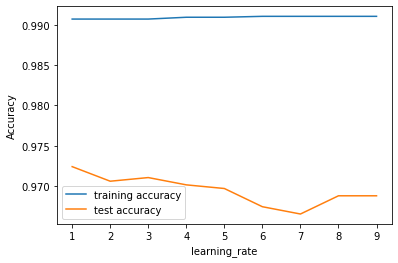

In [62]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [63]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [64]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1  1]

In [ ]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

In [ ]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)


In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [ ]:
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators=100)
model_2 = KNeighborsClassifier(n_neighbors=1)
model_3 = LogisticRegression(random_state=0)
# model_4 = BernoulliNB()
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1), ('KNN', model_2), ('LogisticRegression', model_3),
                                        ('DT', model_5)], voting='hard')

In [ ]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset for naive bayes  reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ensemble, open(filename, 'wb'))

In [ ]:
phising = ensemble.predict(input)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=15)  # Select top 10 features
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing k-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# Initializing RFECV with Random Forest as the estimator
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# Fitting RFECV on the training data
rfecv.fit(X_train_scaled, y_train)

# Creating a DataFrame to store feature selection results
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)

# Sorting the DataFrame based on feature ranking
df_features = df_features.sort_values(by='ranking')

# Filtering out features selected by RFECV
df_features = df_features[df_features['support']]

# Extracting the names of selected features
best_features = df_features['feature'].tolist()

# Selecting only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

print("Number of features after feature selection:", len(best_features))
print(best_features)

In [ ]:

# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
# dispalying total result
result

In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result

## Storing Best Model

In [ ]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

In [ ]:
import os
import pickle

if not os.path.exists('pickle'):
    os.makedirs('pickle')

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [ ]:
current_directory = os.getcwd()

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
